In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import torch

In [2]:
import pickle
with open('/Users/cdonnat/Downloads/drug_data.pkl', 'rb') as f:
    dictionary = pickle.load( f)

In [3]:
dictionary['DB00001'].keys()

dict_keys(['drugbank_id', 'name', 'description', 'indication', 'pharmacodynamics', 'toxicity', 'metabolism', 'absorption', 'half_life', 'market_start', 'affected_organism', 'market_end', 'mechanism_of_action', 'route_of_elimination', 'volume_of_distribution', 'classification', 'carriers', 'targets', 'transporters', 'enzymes', 'atc_code', 'identifiers', 'categories', 'atc_hierarchy', 'food_interactions', 'ddi', 'smile', 'names', 'pathways'])

In [4]:
##### Evaluate the importance of missing data
no_cat = 0
no_atc = 0
no_smile = 0
no_class = 0
no_pathway = 0
no_ddi= 0
no_transporters = 0
no_carriers = 0
no_indication = 0
no_targets = 0
nothing = 0
nothing_list = []
for drug in dictionary.keys():
    if len(dictionary[drug]['atc_hierarchy']) == 0:
        no_atc += 1
    if len(dictionary[drug]['categories']) == 0:
        no_cat += 1
    if len(dictionary[drug]['smile']) == 0:
        no_smile += 1
    if len(dictionary[drug]['classification'])==0:
        no_class +=1
    if len(dictionary[drug]['pathways'])==0:
        no_pathway +=1
    if len(dictionary[drug]['ddi'])==0:
        no_ddi +=1
    if len(dictionary[drug]['transporters'])==0:
        no_transporters +=1
    if len(dictionary[drug]['carriers'])==0:
        no_carriers +=1
    if len(dictionary[drug]['indication'])==0:
        no_indication +=1
        #print(drug)
    if len(dictionary[drug]['targets'])==0:
        no_targets +=1
        #print(drug) 
    if len(dictionary[drug]['atc_hierarchy']) + len(dictionary[drug]['categories']) + len(dictionary[drug]['smile']) + len(dictionary[drug]['pathways'])  + len(dictionary[drug]['classification']) + len(dictionary[drug]['transporters']) + len(dictionary[drug]['ddi'])==0:
        nothing +=1
        nothing_list += [drug]
print(no_cat/len(dictionary), no_atc/len(dictionary), no_smile/len(dictionary), no_class/len(dictionary),
      no_pathway/len(dictionary), no_ddi/len(dictionary), 
      no_carriers/len(dictionary), no_transporters/len(dictionary), no_indication/len(dictionary),
      no_targets/len(dictionary))       

0.4085225288159273 0.7747816975200839 0.2198393293747817 0.2743974851554314 0.9549423681453021 0.7002444987775062 0.9599022004889975 0.9292350681103737 0.7184072651065316 0.7368494586098498


In [125]:
dp = []
king = []
classes =[]
subclasses = []
superclasses =[]

for drug in dictionary.keys():
    if len(dictionary[drug]['classification'])>0:
        dp += [dictionary[drug]['classification']['direct-parent'].lower()]
        king += [dictionary[drug]['classification']['kingdom'].lower()] 
        superclasses += [dictionary[drug]['classification']['superclass'].lower()] 
        classes += [dictionary[drug]['classification']['class'].lower()] 
        subclasses += [dictionary[drug]['classification']['subclass'].lower()] 
    

In [126]:
len(np.unique(dp)), len(np.unique(king)), len(np.unique(superclasses)), len(np.unique(classes)), len(np.unique(subclasses))

(1279, 2, 25, 304, 511)

In [144]:
category = []
for drug in dictionary.keys():
    if len(dictionary[drug]['categories'])>0:
        category += [u[0] for u in dictionary[drug]['categories'] ]
len(np.unique(category))   

4149

In [147]:
category_dict = {}
for drug in dictionary.keys():
    if len(dictionary[drug]['categories'])>0:
        category_dict[drug]= {u[0]: 1 for u in dictionary[drug]['categories'] }
len(np.unique(category))  

4149

In [208]:
cat_mat = pd.DataFrame.from_dict(category_dict, ).T
cat_mat = cat_mat.fillna(0)

In [209]:
cat_mat = cat_mat.iloc[:, np.where(cat_mat.sum()>1)[0]]

In [223]:
cat_mat

,"amino acids, peptides, and proteins",anticoagulants,antithrombin proteins,antithrombins,blood and blood forming organs,cardiovascular agents,enzyme inhibitors,fibrin modulating agents,hematologic agents,peptides,...,"fibroblast growth factor 2, antagonists &amp; inhibitors",phosphorus,live attenuated influenza a virus vaccine,adenovirus vaccines,factor viii,"administration, topical",cobalt,"arthritis, rheumatoid, drug therapy",vitamin k 2,treatments for ebola virus disease
DB00001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB16403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB16404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB16407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB16414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


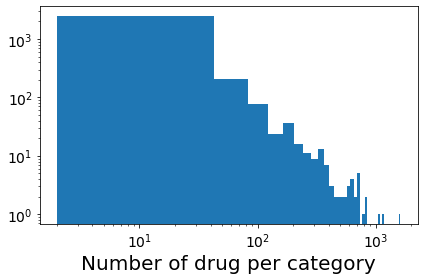

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,4))
counts = cat_mat.sum(0)
#sns.histplot(counts, x='prop')
plt.hist(counts, bins =40 )
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Number of drug per category', fontsize=20)
plt.yscale("log")
plt.xscale("log")
# ax.set_ylabel('Number of drugs \n in each class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/categories_dual.png")

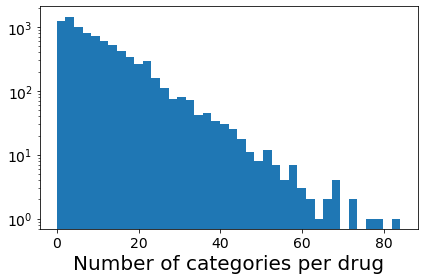

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
counts = cat_mat.sum(1)
#sns.histplot(counts, x='prop')
plt.hist(counts, bins =40 )
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Number of categories per drug', fontsize=20)
plt.yscale("log")
# ax.set_ylabel('Number of drugs \n in each class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/categories_log.png")

In [211]:
cat_mat = cat_mat.fillna(0)

In [212]:
coocc = cat_mat.T.dot(cat_mat)

In [203]:
coocc

,"amino acids, peptides, and proteins",anticoagulants,blood and blood forming organs,cardiovascular agents,enzyme inhibitors,hematologic agents,peptides,protease inhibitors,proteins,antibodies,...,plant preparations,chromones,"metals, heavy",vaccines,increased igg production,actively acquired immunity,non-standardized food allergenic extract,non-standardized plant allergenic extract,non-standardized pollen allergenic extract,non-standardized fungal allergenic extract
"amino acids, peptides, and proteins",1174.0,19.0,48.0,42.0,68.0,37.0,441.0,37.0,636.0,306.0,...,0.0,0.0,1.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
anticoagulants,19.0,93.0,61.0,35.0,23.0,75.0,5.0,20.0,18.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
blood and blood forming organs,48.0,61.0,177.0,37.0,24.0,82.0,16.0,18.0,36.0,3.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
cardiovascular agents,42.0,35.0,37.0,462.0,76.0,60.0,23.0,30.0,26.0,0.0,...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
enzyme inhibitors,68.0,23.0,24.0,76.0,714.0,39.0,33.0,100.0,11.0,0.0,...,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
actively acquired immunity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33.0,0.0,94.0,0.0,0.0,0.0,0.0
non-standardized food allergenic extract,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,8.0,0.0,196.0,53.0,0.0,4.0
non-standardized plant allergenic extract,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,11.0,0.0,53.0,61.0,0.0,0.0
non-standardized pollen allergenic extract,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,196.0,0.0,0.0,0.0,218.0,0.0


/Users/cdonnat/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

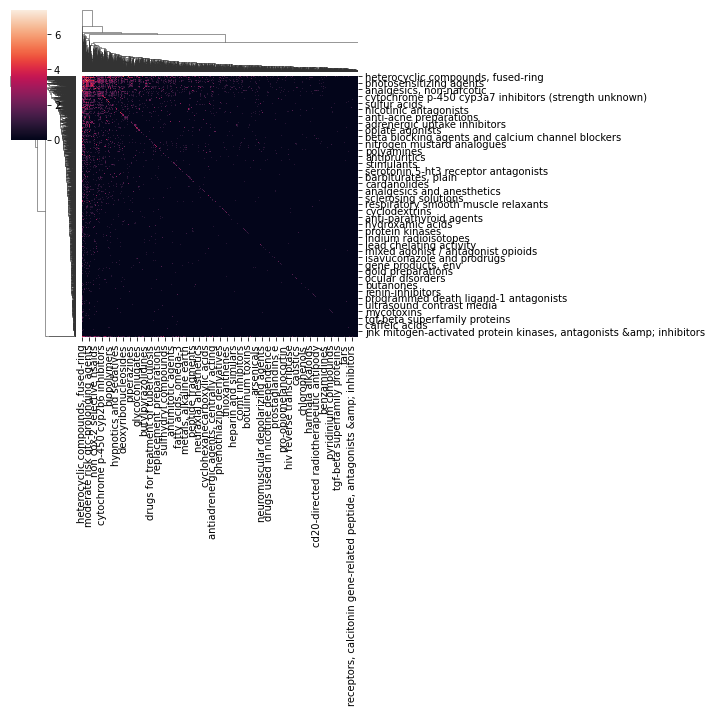

In [213]:
plt.figure()
sns.clustermap(np.log(coocc+1))
plt.savefig('/Users/cdonnat/Downloads/co-occurrence_categories_full.png')

In [206]:
plt.savefig('/Users/cdonnat/Downloads/co-occurrence_categories.png')

<Figure size 432x288 with 0 Axes>

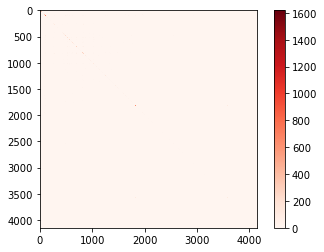

In [155]:
plt.imshow(coocc,interpolation='nearest', cmap='Reds')
plt.colorbar()
plt.show()

In [145]:
len(np.unique(category)) *2

8298

In [129]:
category

[[['amino acids, peptides, and proteins', 'd000602'],
  ['anticoagulants', 'd000925'],
  ['antithrombin proteins', 'd058833'],
  ['antithrombins', 'd000991'],
  ['blood and blood forming organs', ''],
  ['cardiovascular agents', 'd002317'],
  ['enzyme inhibitors', 'd004791'],
  ['fibrin modulating agents', 'd050299'],
  ['hematologic agents', 'd006401'],
  ['peptides', 'd010455'],
  ['protease inhibitors', 'd011480'],
  ['proteins', 'd011506'],
  ['serine protease inhibitors', 'd015842'],
  ['serpins', 'd015843'],
  ['thrombin inhibitors', '']],
 [['amino acids, peptides, and proteins', 'd000602'],
  ['antibodies', 'd000906'],
  ['antibodies, monoclonal', 'd000911'],
  ['antibodies, monoclonal, humanized', 'd061067'],
  ['antineoplastic agents', 'd000970'],
  ['antineoplastic agents, immunological', 'd000074322'],
  ['antineoplastic and immunomodulating agents', ''],
  ['blood proteins', 'd001798'],
  ['epidermal growth factor receptor antagonist', ''],
  ['globulins', 'd005916'],
  ['

In [16]:
###### Remove the drugs that are useless

for n in nothing_list:
    dictionary.pop(n)

In [49]:
hierarchy = []
for drug in dictionary.keys():
    if len(dictionary[drug]['atc_hierarchy'])>0:
        hierarchy += dictionary[drug]['atc_hierarchy']
all_nodes = np.unique(np.array(hierarchy ))

In [51]:
len(np.unique(hierarchy))

2032

In [56]:
nodes = {v:k for k, v in enumerate(np.unique(np.array(hierarchy )))}

In [57]:
import re

In [75]:
edges = []
edges_named = []
all_nodes = np.unique(np.array(hierarchy ))
for k, d in enumerate(all_nodes):
    for kk, dd in enumerate(all_nodes[(k+1):]):
        if len(re.findall("^" + d + "(.*?)", dd))>0:
            edges += [[k, kk+k+1]]
            edges_named  += [[all_nodes[k], all_nodes[k+kk+1]]]
        else:
            

In [236]:
label = pd.DataFrame(all_nodes, columns= ['name'])
label.index = range(len(all_nodes))
label['group'] = "NA"
label_nodes = []
parent = {}
list_labels = []
edges = []
edges_named = []
for k, d in enumerate(all_nodes):
    print(k)
    if len(re.findall("drugs|agents|tests|preparations", d)) == 0:
        s0 = [uu.strip()  for u in re.split('and |for |in combination with |with |acting ', d) for uu in u.split(',')][0]
    else:
        s0 = d
    nb_connections = 0
    candidates =  []
    candidates_nb = []
    candidates_length = []
    for kk, dd in enumerate(all_nodes[:k]):
        if len(re.findall("^" + dd + "(.*?)", d))>0:
            if len(dd) == 1 and (d[:2] in [dd+'0', dd+'1']):
                ### for the code names
                nb_connections += 1
                candidates += [dd]
                candidates_length += [len(dd)]
                candidates_nb += [kk]
            elif len(dd) == 1 and (d[:2] not in [dd+'0', dd+'1']):
                pass
            elif len(dd) > 1:
                nb_connections += 1
                candidates += [dd]
                candidates_length += [len(dd)]
                candidates_nb += [kk]
            else:
                ### Maybe there is more of a clique relationship betweeen entities
                if len(re.findall("drugs|agents|tests|preparations", dd)) == 0:
                    s = [uu.strip()  for u in re.split('and |for |in combination with |with |acting ', dd) for uu in u.split(',')][0]
                else:
                    s = dd
                if s == s0:
                    edges += [[kk, k]]
                    edges_named  += [[dd, d]]
                    
    print(d, candidates)
    nb_connections =len(candidates)
    if len(candidates) > 0:
        index = np.argmax(candidates_length)
        edges += [[candidates_nb[index], k]]
        edges_named  += [[candidates[index], all_nodes[k]]]
        
    it = 0
    if nb_connections == 0:
        edges += [[k, k]]
        edges_named  += [[d,d]]
        label.loc[k]['group'] = s0
        list_labels += [s0]
    else:
        label.loc[k]['group'] = label.loc[candidates_nb[index]]['group']

        

0
2-amino-1-phenylethanol derivatives []
1
3-oxoandrosten (4) derivatives []
2
5-androstanon (3) derivatives []
3
a []
4
a01 ['a']
5
a01a ['a', 'a01']
6
a01aa ['a', 'a01', 'a01a']
7
a01ab ['a', 'a01', 'a01a']
8
a01ac ['a', 'a01', 'a01a']
9
a01ad ['a', 'a01', 'a01a']
10
a02 ['a']
11
a02a ['a', 'a02']
12
a02aa ['a', 'a02', 'a02a']
13
a02ab ['a', 'a02', 'a02a']
14
a02ac ['a', 'a02', 'a02a']
15
a02ad ['a', 'a02', 'a02a']
16
a02af ['a', 'a02', 'a02a']
17
a02b ['a', 'a02']
18
a02ba ['a', 'a02', 'a02b']
19
a02bb ['a', 'a02', 'a02b']
20
a02bc ['a', 'a02', 'a02b']
21
a02bd ['a', 'a02', 'a02b']
22
a02bx ['a', 'a02', 'a02b']
23
a03 ['a']
24
a03a ['a', 'a03']
25
a03aa ['a', 'a03', 'a03a']
26
a03ab ['a', 'a03', 'a03a']
27
a03ac ['a', 'a03', 'a03a']
28
a03ad ['a', 'a03', 'a03a']
29
a03ae ['a', 'a03', 'a03a']
30
a03ax ['a', 'a03', 'a03a']
31
a03b ['a', 'a03']
32
a03ba ['a', 'a03', 'a03b']
33
a03bb ['a', 'a03', 'a03b']
34
a03c ['a', 'a03']
35
a03ca ['a', 'a03', 'a03c']
36
a03cb ['a', 'a03', 'a03c']
37

antineovascularisation agents []
292
antiobesity preparations, excl. diet products []
293
antiparasitic products, insecticides and repellents []
294
antipropulsives []
295
antiprotozoals []
296
antipruritics, incl. antihistamines, anesthetics, etc. []
297
antipsoriatics []
298
antipsoriatics for systemic use ['antipsoriatics']
299
antipsoriatics for topical use ['antipsoriatics']
300
antipsychotics []
301
antiseptics []
302
antiseptics and disinfectants ['antiseptics']
303
antispasmodics in combination with analgesics []
304
antispasmodics in combination with psycholeptics []
305
antithrombotic agents []
306
antithyroid preparations []
307
antitrematodals []
308
antivaricose therapy []
309
antivertigo preparations []
310
antivirals []
311
antivirals for systemic use ['antivirals']
312
antivirals for treatment of hcv infections ['antivirals']
313
antivirals for treatment of hiv infections, combinations ['antivirals']
314
antracen derivatives []
315
anxiolytics []
316
aromatase inhibitor

c05bb ['c', 'c05', 'c05b']
529
c05bx ['c', 'c05', 'c05b']
530
c05c ['c', 'c05']
531
c05ca ['c', 'c05', 'c05c']
532
c05cx ['c', 'c05', 'c05c']
533
c07 ['c']
534
c07a ['c', 'c07']
535
c07aa ['c', 'c07', 'c07a']
536
c07ab ['c', 'c07', 'c07a']
537
c07ag ['c', 'c07', 'c07a']
538
c07b ['c', 'c07']
539
c07ba ['c', 'c07', 'c07b']
540
c07bb ['c', 'c07', 'c07b']
541
c07bg ['c', 'c07', 'c07b']
542
c07c ['c', 'c07']
543
c07ca ['c', 'c07', 'c07c']
544
c07cb ['c', 'c07', 'c07c']
545
c07cg ['c', 'c07', 'c07c']
546
c07d ['c', 'c07']
547
c07da ['c', 'c07', 'c07d']
548
c07db ['c', 'c07', 'c07d']
549
c07f ['c', 'c07']
550
c07fb ['c', 'c07', 'c07f']
551
c07fx ['c', 'c07', 'c07f']
552
c08 ['c']
553
c08c ['c', 'c08']
554
c08ca ['c', 'c08', 'c08c']
555
c08cx ['c', 'c08', 'c08c']
556
c08d ['c', 'c08']
557
c08da ['c', 'c08', 'c08d']
558
c08db ['c', 'c08', 'c08d']
559
c08e ['c', 'c08']
560
c08ea ['c', 'c08', 'c08e']
561
c08ex ['c', 'c08', 'c08e']
562
c08g ['c', 'c08']
563
c08ga ['c', 'c08', 'c08g']
564
c09 ['c'

dermatologicals []
765
detoxifying agents for antineoplastic treatment []
766
diagnostic agents []
767
diagnostic radiopharmaceuticals []
768
diaminopyrimidines []
769
diazepines, oxazepines, thiazepines and oxepines []
770
dibenzo-bicyclo-octadiene derivatives []
771
dichloroacetamide derivatives []
772
digestives, incl. enzymes []
773
digitalis glycosides []
774
dihydropyridine derivatives []
775
dipeptidyl peptidase 4 (dpp-4) inhibitors []
776
diphenylbutylpiperidine derivatives []
777
diphenylmethane derivatives []
778
diphenylpropylamine derivatives []
779
diphtheria vaccines []
780
direct acting antivirals []
781
direct factor xa inhibitors []
782
direct thrombin inhibitors []
783
diuretics []
784
diuretics and potassium-sparing agents in combination ['diuretics']
785
dopa and dopa derivatives []
786
dopamine agonists []
787
dopaminergic agents []
788
drugs affecting bone structure and mineralization []
789
drugs for acid related disorders []
790
drugs for constipation []
791
dru

insulins and analogues for injection, intermediate-acting ['insulins and analogues']
1009
insulins and analogues for injection, long-acting ['insulins and analogues']
1010
interferons []
1011
interleukin inhibitors []
1012
interleukins []
1013
intermediate-acting sulfonamides []
1014
intestinal adsorbents []
1015
intestinal antiinfectives []
1016
intestinal antiinflammatory agents []
1017
intravaginal contraceptives []
1018
iodine (123i) compounds []
1019
iodine (131i) compounds []
1020
iodine products []
1021
iron bivalent, oral preparations []
1022
iron chelating agents []
1023
iron in combination with folic acid []
1024
iron in other combinations []
1025
iron preparations []
1026
iron trivalent, oral preparations []
1027
irrigating solutions []
1028
j []
1029
j01 ['j']
1030
j01a ['j', 'j01']
1031
j01aa ['j', 'j01', 'j01a']
1032
j01b ['j', 'j01']
1033
j01ba ['j', 'j01', 'j01b']
1034
j01c ['j', 'j01']
1035
j01ca ['j', 'j01', 'j01c']
1036
j01ce ['j', 'j01', 'j01c']
1037
j01cf ['j', 'j0

n01ah ['n', 'n01', 'n01a']
1276
n01ax ['n', 'n01', 'n01a']
1277
n01b ['n', 'n01']
1278
n01ba ['n', 'n01', 'n01b']
1279
n01bb ['n', 'n01', 'n01b']
1280
n01bc ['n', 'n01', 'n01b']
1281
n01bx ['n', 'n01', 'n01b']
1282
n02 ['n']
1283
n02a ['n', 'n02']
1284
n02aa ['n', 'n02', 'n02a']
1285
n02ab ['n', 'n02', 'n02a']
1286
n02ac ['n', 'n02', 'n02a']
1287
n02ad ['n', 'n02', 'n02a']
1288
n02ae ['n', 'n02', 'n02a']
1289
n02af ['n', 'n02', 'n02a']
1290
n02ag ['n', 'n02', 'n02a']
1291
n02aj ['n', 'n02', 'n02a']
1292
n02ax ['n', 'n02', 'n02a']
1293
n02b ['n', 'n02']
1294
n02ba ['n', 'n02', 'n02b']
1295
n02bb ['n', 'n02', 'n02b']
1296
n02be ['n', 'n02', 'n02b']
1297
n02bg ['n', 'n02', 'n02b']
1298
n02c ['n', 'n02']
1299
n02ca ['n', 'n02', 'n02c']
1300
n02cb ['n', 'n02', 'n02c']
1301
n02cc ['n', 'n02', 'n02c']
1302
n02cd ['n', 'n02', 'n02c']
1303
n02cx ['n', 'n02', 'n02c']
1304
n03 ['n']
1305
n03a ['n', 'n03']
1306
n03aa ['n', 'n03', 'n03a']
1307
n03ab ['n', 'n03', 'n03a']
1308
n03ac ['n', 'n03', 'n03

other immunosuppressants []
1505
other insecticides and repellents []
1506
other intestinal adsorbents []
1507
other intestinal antiinfectives []
1508
other irrigating solutions []
1509
other lipid modifying agents []
1510
other local anesthetics []
1511
other low-ceiling diuretics []
1512
other magnetic resonance imaging contrast media []
1513
other mineral supplements []
1514
other muscle relaxants, peripherally acting agents []
1515
other nasal preparations []
1516
other nervous system drugs []
1517
other non-selective calcium channel blockers []
1518
other nutrients []
1519
other ophthalmologicals []
1520
other opioids []
1521
other otologicals []
1522
other parasympathomimetics []
1523
other peripheral vasodilators []
1524
other plain vitamin preparations []
1525
other plant alkaloids and natural products []
1526
other potassium-sparing agents []
1527
other psychostimulants and nootropics []
1528
other quaternary ammonium compounds []
1529
other quinolones []
1530
other renal syst

retinoids for treatment of acne []
1743
retinoids for treatment of psoriasis []
1744
rota virus diarrhea vaccines []
1745
rubella vaccines []
1746
s []
1747
s01 ['s']
1748
s01a ['s', 's01']
1749
s01aa ['s', 's01', 's01a']
1750
s01ab ['s', 's01', 's01a']
1751
s01ad ['s', 's01', 's01a']
1752
s01ae ['s', 's01', 's01a']
1753
s01ax ['s', 's01', 's01a']
1754
s01b ['s', 's01']
1755
s01ba ['s', 's01', 's01b']
1756
s01bb ['s', 's01', 's01b']
1757
s01bc ['s', 's01', 's01b']
1758
s01c ['s', 's01']
1759
s01ca ['s', 's01', 's01c']
1760
s01cb ['s', 's01', 's01c']
1761
s01cc ['s', 's01', 's01c']
1762
s01e ['s', 's01']
1763
s01ea ['s', 's01', 's01e']
1764
s01eb ['s', 's01', 's01e']
1765
s01ec ['s', 's01', 's01e']
1766
s01ed ['s', 's01', 's01e']
1767
s01ee ['s', 's01', 's01e']
1768
s01ex ['s', 's01', 's01e']
1769
s01f ['s', 's01']
1770
s01fa ['s', 's01', 's01f']
1771
s01fb ['s', 's01', 's01f']
1772
s01g ['s', 's01']
1773
s01ga ['s', 's01', 's01g']
1774
s01gx ['s', 's01', 's01g']
1775
s01h ['s', 's01']


v10 ['v']
1988
v10a ['v', 'v10']
1989
v10aa ['v', 'v10', 'v10a']
1990
v10ax ['v', 'v10', 'v10a']
1991
v10b ['v', 'v10']
1992
v10bx ['v', 'v10', 'v10b']
1993
v10x ['v', 'v10']
1994
v10xa ['v', 'v10', 'v10x']
1995
v10xx ['v', 'v10', 'v10x']
1996
vaccines []
1997
various []
1998
various alimentary tract and metabolism products ['various']
1999
various diagnostic radiopharmaceuticals ['various']
2000
various pain palliation radiopharmaceuticals ['various']
2001
various therapeutic radiopharmaceuticals ['various']
2002
various thyroid diagnostic radiopharmaceuticals ['various']
2003
vasodilators used in cardiac diseases []
2004
vasopressin and analogues []
2005
vasopressin antagonists []
2006
vasoprotectives []
2007
vinca alkaloids and analogues []
2008
viral vaccines []
2009
viscoelastic substances []
2010
vitamin a and d, incl. combinations of the two []
2011
vitamin a, plain []
2012
vitamin b1, plain []
2013
vitamin b1, plain and in combination with vitamin b6 and b12 ['vitamin b1, plain

In [244]:
dictionary['DB00001']['classification']

{'direct-parent': 'Peptides',
 'kingdom': 'Organic Compounds',
 'superclass': 'Organic Acids',
 'class': 'Carboxylic Acids and Derivatives',
 'subclass': 'Amino Acids, Peptides, and Analogues'}

In [53]:
node_classes = []
node_classes_dict = {}
it = 0
for drug in dictionary.keys():
    if len(dictionary[drug]['classification'])>0:
        parent = dictionary[drug]['classification']['direct-parent'].lower()
        kingdom = dictionary[drug]['classification']['kingdom'].lower()
        sup = dictionary[drug]['classification']['superclass'].lower()
        sub = dictionary[drug]['classification']['subclass'].lower()
        cl = dictionary[drug]['classification']['class'].lower()
        if drug not in node_classes_dict.keys():
            node_classes_dict[drug] = {'ID': it,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                        'subclass': sub,
                                       'class': cl
                                      }
            it +=1
            
        if parent not in node_classes_dict.keys():
            node_classes_dict[parent] = {'ID': it,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                       'subclass': sub,
                                       'class': cl
                                      }
            it +=1
        if sub not in node_classes_dict.keys():
            node_classes_dict[sub] = {'ID': it,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                       'subclass': sub,
                                       'class': cl
                                      }
            it +=1
        if cl not in node_classes_dict.keys():
            node_classes_dict[cl] = {'ID': it,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                       'subclass': 'NA',
                                       'class': cl
                                      }
            it +=1
        if sup not in node_classes_dict.keys():
            node_classes_dict[sup] = {'ID': it,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                       'subclass': 'NA',
                                       'class': 'NA'
                                      }
            it +=1
        if  kingdom not in node_classes_dict.keys():
            node_classes_dict[kingdom] = {'ID': it,
                                      'kingdom': kingdom,
                                       'superclass': 'NA',
                                       'subclass': 'NA',
                                       'class': 'NA'
                                      }
            it +=1

        

        

In [64]:
node_classes = []
node_classes_dict2 = {}
it = 0
for drug in dictionary.keys():
    if len(dictionary[drug]['classification'])>0:
        parent = dictionary[drug]['classification']['direct-parent'].lower()
        kingdom = dictionary[drug]['classification']['kingdom'].lower()
        sup = dictionary[drug]['classification']['superclass'].lower()
        sub = dictionary[drug]['classification']['subclass'].lower()
        cl = dictionary[drug]['classification']['class'].lower()
        if drug not in node_classes_dict2.keys():
            node_classes_dict2[drug] = {'ID': it,
                                       'parent': parent,
                                      'kingdom': kingdom,
                                       'superclass': sup,
                                        'subclass': sub,
                                       'class': cl
                                      }
            it +=1


        

        

In [66]:
node_classes_pd = pd.DataFrame.from_dict(node_classes_dict2).T

In [67]:
node_classes_pd

,ID,parent,kingdom,superclass,subclass,class
DB00001,0,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB00002,1,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB00003,2,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB00004,3,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB00005,4,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
...,...,...,...,...,...,...
DB16419,10382,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB16420,10383,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB16421,10384,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives
DB16422,10385,peptides,organic compounds,organic acids,"amino acids, peptides, and analogues",carboxylic acids and derivatives


In [73]:
node_classes_pd.groupby(node_classes_pd['superclass']).value_counts(normalize=True).rename('prop').reset_index()

,superclass,ID,parent,kingdom,subclass,class,prop
0,alkaloids and derivatives,230,lysergamides,organic compounds,lysergic acids and derivatives,ergoline and derivatives,0.008333
1,alkaloids and derivatives,189,yohimbine alkaloids,organic compounds,none,yohimbine alkaloids,0.008333
2,alkaloids and derivatives,9572,morphinans,organic compounds,none,morphinans,0.008333
3,alkaloids and derivatives,7186,cytisine and derivatives,organic compounds,cytisine and derivatives,lupin alkaloids,0.008333
4,alkaloids and derivatives,8341,camptothecins,organic compounds,none,camptothecins,0.008333
...,...,...,...,...,...,...,...
10382,phenylpropanoids and polyketides,5238,phenylpropanoic acids,organic compounds,none,phenylpropanoic acids,0.002695
10383,phenylpropanoids and polyketides,5241,2-arylbenzofuran flavonoids,organic compounds,none,2-arylbenzofuran flavonoids,0.002695
10384,phenylpropanoids and polyketides,5260,phenylpropanoic acids,organic compounds,none,phenylpropanoic acids,0.002695
10385,phenylpropanoids and polyketides,4447,depsides and depsidones,organic compounds,none,depsides and depsidones,0.002695


In [85]:
node_classes_pd.groupby('superclass').value_counts(normalize=False)

(10387,)

In [89]:
node_classes_pd['superclass'].value_counts(normalize=False).rename('prop')

organoheterocyclic compounds                 2846
benzenoids                                   2186
organic acids and derivatives                1641
lipids and lipid-like molecules               792
organic acids                                 782
organic oxygen compounds                      725
phenylpropanoids and polyketides              371
nucleosides, nucleotides, and analogues       356
organic nitrogen compounds                    217
alkaloids and derivatives                     120
mixed metal/non-metal compounds                92
homogeneous non-metal compounds                53
organosulfur compounds                         50
organohalogen compounds                        42
homogeneous metal compounds                    40
organic polymers                               28
lignans, neolignans and related compounds      15
organophosphorus compounds                      9
organometallic compounds                        6
organic 1,3-dipolar compounds                   5


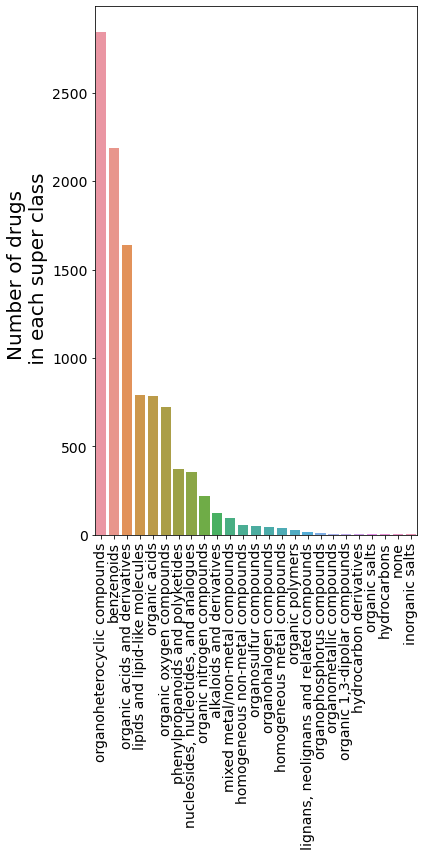

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,12))
counts = node_classes_pd['superclass'].value_counts(normalize=False).rename('prop').reset_index().pipe((sns.barplot, "data"), x='index', y='prop')
plt.xticks(rotation=90)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('')
ax.set_ylabel('Number of drugs \n in each super class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/superclasses.png")

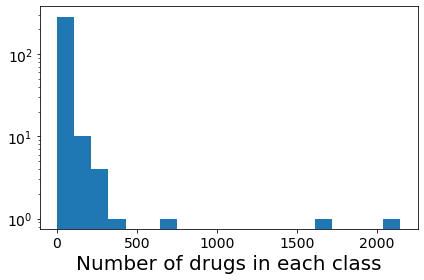

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,4))
counts = node_classes_pd['class'].value_counts(normalize=False).rename('prop').reset_index()
#sns.histplot(counts, x='prop')
plt.hist(counts['prop'], bins =20 )
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Number of drugs in each class', fontsize=20)
plt.yscale("log")
# ax.set_ylabel('Number of drugs \n in each class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/classes.png")

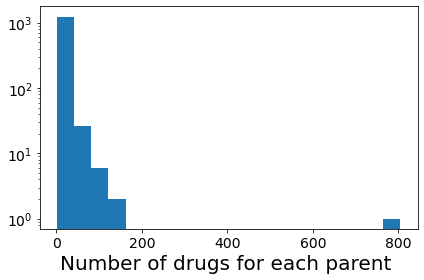

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,4))
counts = node_classes_pd['parent'].value_counts(normalize=False).rename('prop').reset_index()
#sns.histplot(counts, x='prop')
plt.hist(counts['prop'], bins =20 )
ax.tick_params(axis='both', labelsize=14)
ax.set_xlabel('Number of drugs for each parent ', fontsize=20)
plt.yscale("log")
# ax.set_ylabel('Number of drugs \n in each class', fontsize=20)
plt.tight_layout()
plt.savefig("/Users/cdonnat/Downloads/parent.png")

In [112]:
counts

,index,prop
0,carboxylic acids and derivatives,2146
1,benzene and substituted derivatives,1684
2,organooxygen compounds,695
3,steroids and steroid derivatives,353
4,indoles and derivatives,280
...,...,...
299,organo-post-transition metal compounds,1
300,"2',3'-dideoxy-3'-thionucleoside monophosphates",1
301,thiocarbonyl compounds,1
302,molybdopterin dinucleotides,1


In [109]:
counts = node_classes_pd['class'].value_counts(normalize=False).rename('prop').reset_index()

In [110]:
counts

,index,prop
0,carboxylic acids and derivatives,2146
1,benzene and substituted derivatives,1684
2,organooxygen compounds,695
3,steroids and steroid derivatives,353
4,indoles and derivatives,280
...,...,...
299,organo-post-transition metal compounds,1
300,"2',3'-dideoxy-3'-thionucleoside monophosphates",1
301,thiocarbonyl compounds,1
302,molybdopterin dinucleotides,1


In [55]:
len(node_classes_dict)

11889

In [34]:
help(pd.DataFrame.from_dict)

Help on method from_dict in module pandas.core.frame:

from_dict(data, orient: 'str' = 'columns', dtype: 'Dtype | None' = None, columns=None) -> 'DataFrame' method of builtins.type instance
    Construct DataFrame from dict of array-like or dicts.
    
    Creates DataFrame object from dictionary by columns or by index
    allowing dtype specification.
    
    Parameters
    ----------
    data : dict
        Of the form {field : array-like} or {field : dict}.
    orient : {'columns', 'index', 'tight'}, default 'columns'
        The "orientation" of the data. If the keys of the passed dict
        should be the columns of the resulting DataFrame, pass 'columns'
        (default). Otherwise if the keys should be rows, pass 'index'.
        If 'tight', assume a dict with keys ['index', 'columns', 'data',
        'index_names', 'column_names'].
    
        .. versionadded:: 1.4.0
           'tight' as an allowed value for the ``orient`` argument
    
    dtype : dtype, default None
    

In [56]:
pd.DataFrame.from_dict(node_classes_dict).T.to_csv("/Users/cdonnat/Downloads/nodes_classes.csv", index=False)

In [57]:
edges_classes = []
for drug in dictionary.keys():
    if len(dictionary[drug]['classification'])>0:
        parent = dictionary[drug]['classification']['direct-parent'].lower()
        kingdom = dictionary[drug]['classification']['kingdom'].lower()
        sup = dictionary[drug]['classification']['superclass'].lower()
        sub = dictionary[drug]['classification']['subclass'].lower()
        cl = dictionary[drug]['classification']['class'].lower()
        edges_classes += [
            [node_classes_dict[drug]['ID'], node_classes_dict[parent]['ID']],
            [node_classes_dict[kingdom]['ID'], node_classes_dict[sup]['ID']],
            [node_classes_dict[sup]['ID'],node_classes_dict[cl]['ID']],
            [node_classes_dict[cl]['ID'], node_classes_dict[sub]['ID']],
            [node_classes_dict[sub]['ID'], node_classes_dict[parent]['ID']],
        ]


In [58]:
pd.DataFrame(edges_classes, columns=['source', 'target']).to_csv("/Users/cdonnat/Downloads/edges_classes.csv", index=False)

In [254]:
np.unique(edges_classes)

array(["(3'-&gt;5')-dinucleotides",
       "(3'-&gt;5')-dinucleotides and analogues",
       "(5'-&gt;5')-dinucleotides", ..., 'ynones', 'yohimbine alkaloids',
       'zearalenones'], dtype='<U60')

In [ ]:
label = pd.DataFrame(all_nodes, columns= ['name'])
label.index = range(len(all_nodes))
label['group'] = "NA"
label_nodes = []
parent = {}
list_labels = []
edges = []
edges_named = []
for k, d in enumerate(all_nodes):
    print(k)
    if len(re.findall("drugs|agents|tests|preparations", d)) == 0:
        s0 = [uu.strip()  for u in re.split('and |for |in combination with |with |acting ', d) for uu in u.split(',')][0]
    else:
        s0 = d
    nb_connections = 0
    candidates =  []
    candidates_nb = []
    candidates_length = []
    for kk, dd in enumerate(all_nodes[:k]):
        if len(re.findall("^" + dd + "(.*?)", d))>0:
            if len(dd) == 1 and (d[:2] in [dd+'0', dd+'1']):
                ### for the code names
                nb_connections += 1
                candidates += [dd]
                candidates_length += [len(dd)]
                candidates_nb += [kk]
            elif len(dd) == 1 and (d[:2] not in [dd+'0', dd+'1']):
                pass
            elif len(dd) > 1:
                nb_connections += 1
                candidates += [dd]
                candidates_length += [len(dd)]
                candidates_nb += [kk]
            else:
                ### Maybe there is more of a clique relationship betweeen entities
                if len(re.findall("drugs|agents|tests|preparations", dd)) == 0:
                    s = [uu.strip()  for u in re.split('and |for |in combination with |with |acting ', dd) for uu in u.split(',')][0]
                else:
                    s = dd
                if s == s0:
                    edges += [[kk, k]]
                    edges_named  += [[dd, d]]
                    
    print(d, candidates)
    nb_connections =len(candidates)
    if len(candidates) > 0:
        index = np.argmax(candidates_length)
        edges += [[candidates_nb[index], k]]
        edges_named  += [[candidates[index], all_nodes[k]]]
        
    it = 0
    if nb_connections == 0:
        edges += [[k, k]]
        edges_named  += [[d,d]]
        label.loc[k]['group'] = s0
        list_labels += [s0]
    else:
        label.loc[k]['group'] = label.loc[candidates_nb[index]]['group']

        

In [234]:
k=100
d = all_nodes[k]
if True:
    if len(re.findall("drugs|agents|tests|preparations", d)) == 0:
        s0 = [uu.strip()  for u in re.split('and |for |in combination with |with |acting ', d) for uu in u.split(',')][0]
    else:
        s0 = d
    print(s0)
    nb_connections = 0
    candidates =  []
    candidates_nb = []
    candidates_length = []
    for kk, dd in enumerate(all_nodes[:k]):
        if len(re.findall("^" + dd + "(.*?)", d))>0:
            if len(dd) == 1 and (d[:2] in [dd+'0', dd+'1']):
                ### for the code names
                nb_connections += 1
                candidates += [dd]
                candidates_length += [len(dd)]
                candidates_nb += [kk]
            elif len(dd) == 1 and (d[:2] not in [dd+'0', dd+'1']):
                pass
            elif len(dd) > 1:
                nb_connections += 1
                candidates += [dd]
                candidates_length += [len(dd)]
                candidates_nb += [kk]
            else:
                ### Maybe there is more of a clique relationship betweeen entities
                if len(re.findall("drugs|agents|tests|preparations", dd)) == 0:
                    s = [uu.strip()  for u in re.split('and |for |in combination with |with |acting ', dd) for uu in u.split(',')][0]
                else:
                    s = dd
                if s == s0:
                    edges += [[kk, k]]
                    edges_named  += [[dd, d]]
    print(candidates)
    nb_connections = len(candidates)
                    
    if len(candidates) > 0:
        index = np.argmax(candidates_length)
        edges += [[candidates_nb[index], k]]
        edges_named  += [[candidates[index], all_nodes[k]]]
        
    it = 0
    if nb_connections == 0:
        edges += [[k, k]]
        edges_named  += [[d,d]]
        label.loc[k]['group'] = s0
        list_labels += [s0]
    else:
        label.loc[k]['group'] = label.loc[candidates_nb[index]]['group']



a10bd
['a', 'a10', 'a10b']


In [235]:
[[candidates[index], all_nodes[k]]]

[['a10b', 'a10bd']]

In [229]:
edges_named 

[['2-amino-1-phenylethanol derivatives',
  '2-amino-1-phenylethanol derivatives'],
 ['3-oxoandrosten (4) derivatives', '3-oxoandrosten (4) derivatives'],
 ['5-androstanon (3) derivatives', '5-androstanon (3) derivatives'],
 ['a', 'a'],
 ['a', 'a01'],
 ['a', 'a01a'],
 ['a', 'a01aa'],
 ['a', 'a01ab'],
 ['a', 'a01ac'],
 ['a', 'a01ad'],
 ['a', 'a02'],
 ['a', 'a02a'],
 ['a', 'a02aa'],
 ['a', 'a02ab'],
 ['a', 'a02ac'],
 ['a', 'a02ad'],
 ['a', 'a02af'],
 ['a', 'a02b'],
 ['a', 'a02ba'],
 ['a', 'a02bb'],
 ['a', 'a02bc'],
 ['a', 'a02bd'],
 ['a', 'a02bx'],
 ['a', 'a03'],
 ['a', 'a03a'],
 ['a', 'a03aa'],
 ['a', 'a03ab'],
 ['a', 'a03ac'],
 ['a', 'a03ad'],
 ['a', 'a03ae'],
 ['a', 'a03ax'],
 ['a', 'a03b'],
 ['a', 'a03ba'],
 ['a', 'a03bb'],
 ['a', 'a03c'],
 ['a', 'a03ca'],
 ['a', 'a03cb'],
 ['a', 'a03d'],
 ['a', 'a03da'],
 ['a', 'a03db'],
 ['a', 'a03f'],
 ['a', 'a03fa'],
 ['a', 'a04'],
 ['a', 'a04a'],
 ['a', 'a04aa'],
 ['a', 'a04ad'],
 ['a', 'a05'],
 ['a', 'a05a'],
 ['a', 'a05aa'],
 ['a', 'a05ab'],
 [

In [181]:
label.to_csv("/Users/cdonnat/Downloads/nodes_atc.csv")

In [237]:
label.to_csv("/Users/cdonnat/Downloads/nodes_atc.csv")
e = pd.DataFrame(edges, columns =['source', 'target'])
e.to_csv("/Users/cdonnat/Downloads/edges_atc.csv")

In [218]:
all_nodes[160]

'agents against amoebiasis and other protozoal diseases'

In [165]:
re.split('and|for|in combination','agents for dermatitis')

['agents ', ' dermatitis']

In [82]:
G = nx.Graph()
for i in range(len(all_nodes)):
    G.add_node(i, name=all_nodes[i])
G.add_edges_from(edges)

In [97]:
all_nodes

array(['2-amino-1-phenylethanol derivatives',
       '3-oxoandrosten (4) derivatives', '5-androstanon (3) derivatives',
       ..., 'yellow fever vaccines', 'yttrium (90y) compounds', 'zinc'],
      dtype='<U95')

In [95]:
e = pd.DataFrame(edges, columns =['source', 'target'])
e.to_csv("/Users/cdonnat/Downloads/edges_atc.csv")

In [88]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[324,
 237,
 139,
 135,
 123,
 120,
 106,
 106,
 88,
 84,
 82,
 68,
 68,
 61,
 6,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

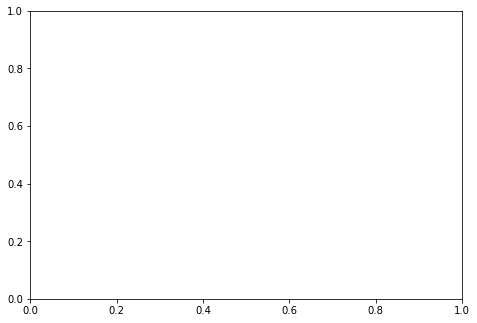

In [86]:
nx.draw(G.to_undirected())

In [45]:
dictionary['DB00001']['atc_hierarchy']

[('b01ae', 'direct thrombin inhibitors'),
 ('b01a', 'antithrombotic agents'),
 ('b01', 'antithrombotic agents'),
 ('b', 'blood and blood forming organs')]

In [41]:
len()

/Users/cdonnat/anaconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


1284

In [42]:
np.unique(hierarchy )

array([list([('a01aa', 'caries prophylactic agents'), ('a01a', 'stomatological preparations'), ('a01', 'stomatological preparations'), ('a', 'alimentary tract and metabolism')]),
       list([('a01aa', 'caries prophylactic agents'), ('a01a', 'stomatological preparations'), ('a01', 'stomatological preparations'), ('a', 'alimentary tract and metabolism'), ('a01aa', 'caries prophylactic agents'), ('a01a', 'stomatological preparations'), ('a01', 'stomatological preparations'), ('a', 'alimentary tract and metabolism'), ('a12cd', 'fluoride'), ('a12c', 'other mineral supplements'), ('a12', 'mineral supplements'), ('a', 'alimentary tract and metabolism')]),
       list([('a01ab', 'antiinfectives and antiseptics for local oral treatment'), ('a01a', 'stomatological preparations'), ('a01', 'stomatological preparations'), ('a', 'alimentary tract and metabolism')]),
       ...,
       list([('v10bx', 'various pain palliation radiopharmaceuticals'), ('v10b', 'pain palliation (bone seeking agents)'),

In [38]:
dictionary['DB00001']['atc_hierarchy']

[('b01ae', 'direct thrombin inhibitors'),
 ('b01a', 'antithrombotic agents'),
 ('b01', 'antithrombotic agents'),
 ('b', 'blood and blood forming organs')]

In [293]:
##### Evaluate the importance of missing data
no_cat = 0
no_atc = 0
no_smile = 0
no_class = 0
no_pathway = 0
no_ddi= 0
no_transporters = 0
no_carriers = 0
no_indication = 0
no_targets = 0
nothing = 0
nothing_list = []
for drug in dictionary.keys():
    if len(dictionary[drug]['atc_hierarchy']) == 0:
        no_atc += 1
    if len(dictionary[drug]['categories']) == 0:
        no_cat += 1
    if len(dictionary[drug]['smile']) == 0:
        no_smile += 1
    if len(dictionary[drug]['classification'])==0:
        no_class +=1
    if len(dictionary[drug]['pathways'])==0:
        no_pathway +=1
    if len(dictionary[drug]['ddi'])==0:
        no_ddi +=1
    if len(dictionary[drug]['transporters'])==0:
        no_transporters +=1
    if len(dictionary[drug]['carriers'])==0:
        no_carriers +=1
    if len(dictionary[drug]['indication'])==0:
        no_indication +=1
        #print(drug)
    if len(dictionary[drug]['targets'])==0:
        no_targets +=1
        #print(drug) 
    if len(dictionary[drug]['atc_hierarchy']) + len(dictionary[drug]['categories']) + len(dictionary[drug]['smile']) + len(dictionary[drug]['pathways'])  + len(dictionary[drug]['classification']) + len(dictionary[drug]['transporters']) + len(dictionary[drug]['ddi'])==0:
        nothing +=1
        nothing_list += [drug]
print(no_cat/len(dictionary), no_atc/len(dictionary), no_smile/len(dictionary), no_class/len(dictionary),
      no_pathway/len(dictionary), no_ddi/len(dictionary), 
      no_carriers/len(dictionary), no_transporters/len(dictionary), no_indication/len(dictionary),
      no_targets/len(dictionary)) 

0.3604501850592945 0.7564770753078027 0.15643175466424958 0.21542412568925146 0.9512803081803761 0.6758818641891382 0.9567943198126747 0.9234836468011179 0.7172747186343379 0.7250547624442933


In [308]:
(len(dictionary) -no_indication), (len(dictionary) -no_indication)/len(dictionary)

(3743, 0.28272528136566205)

In [91]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
mols = []
for drug in dictionary.keys():
    if len(dictionary[drug]['smile'])>0:
        try:
            fp = Chem.RDKFingerprint(Chem.MolFromSmiles(dictionary[drug]['smile'][0]))
            mols += [[drug, dictionary[drug]['smile'][0], fp ]]
        except:
            print(drug)

[16:08:53] Explicit valence for atom # 0 N, 4, is greater than permitted
[16:08:53] Explicit valence for atom # 0 N, 4, is greater than permitted


DB00515
DB00526


[16:08:54] Explicit valence for atom # 0 N, 4, is greater than permitted


DB00958


[16:08:56] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[16:08:56] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[16:08:56] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'


DB01929
DB01999


[16:08:56] Explicit valence for atom # 14 N, 5, is greater than permitted


DB02188


[16:08:57] Explicit valence for atom # 19 O, 3, is greater than permitted


DB02667


[16:08:58] Explicit valence for atom # 6 N, 4, is greater than permitted


DB03492


[16:08:58] Explicit valence for atom # 0 O, 3, is greater than permitted
[16:08:59] Explicit valence for atom # 3 N, 4, is greater than permitted
[16:08:59] Unusual charge on atom 0 number of radical electrons set to zero


DB04100
DB04231


[16:08:59] Explicit valence for atom # 4 F, 2, is greater than permitted


DB04444


[16:09:03] Explicit valence for atom # 13 Be, 3, is greater than permitted


DB08276


[16:09:05] Explicit valence for atom # 84 N, 4, is greater than permitted


DB09385


[16:09:06] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[16:09:06] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


DB11630


[16:09:07] Explicit valence for atom # 1 Cl, 4, is greater than permitted


DB12453


[16:09:09] Explicit valence for atom # 0 N, 4, is greater than permitted


DB13145


[16:09:10] Explicit valence for atom # 5 K, 2, is greater than permitted


DB14497


[16:09:12] WARNING: not removing hydrogen atom without neighbors
[16:09:12] WARNING: not removing hydrogen atom without neighbors
[16:09:12] WARNING: not removing hydrogen atom without neighbors


DB16407


[16:09:12] Explicit valence for atom # 14 N, 4, is greater than permitted


In [93]:
np.zeros((len(mols), len(mols)))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
#### Compute the similarity between these molecule
from rdkit import DataStructs
similarity_graph = np.zeros((len(mols), len(mols)))
for i, m in enumerate(mols):
    print(i)
    for j, mm in enumerate(mols):
        similarity_graph[i,j] = DataStructs.FingerprintSimilarity(m[2], mm[2])
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347


6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992


8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636


10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
1023

In [333]:
np.quantile(0.20,similarity_graph.flatten())

KeyboardInterrupt: 

Text(11.625, 0.5, 'Count')

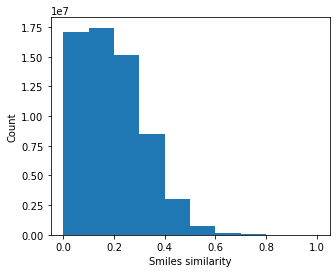

In [347]:
import seaborn as sb
plt.subplots(figsize=(5,4))
plt.hist((similarity_graph)[np.triu_indices(similarity_graph.shape[0], k=1)])
plt.savefig("/Users/cdonnat/Downloads/similarities_smiles_data.png")
plt.xlabel("Smiles similarity")
plt.ylabel("Count")

In [348]:
?np.quantile

In [351]:
np.quantile((similarity_graph)[np.triu_indices(similarity_graph.shape[0], k=1)], np.array([0.8, 0.9, 0.95]))

array([0.30078637, 0.36536485, 0.42047532])

In [352]:
threshold = np.quantile((similarity_graph)[np.triu_indices(similarity_graph.shape[0], k=1)], np.array([0.95]))[0]
similarity_graph[np.where(similarity_graph<threshold)] = 0


array([[1.        , 0.63746959, 0.58045555, ..., 0.        , 0.        ,
        0.42188351],
       [0.63746959, 1.        , 0.87420382, ..., 0.        , 0.4592853 ,
        0.49973362],
       [0.58045555, 0.87420382, 1.        , ..., 0.        , 0.49458689,
        0.55023672],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.4592853 , 0.49458689, ..., 0.        , 1.        ,
        0.60625   ],
       [0.42188351, 0.49973362, 0.55023672, ..., 0.        , 0.60625   ,
        1.        ]])

In [355]:
similarity_graph_binarized = copy.deepcopy(similarity_graph)
similarity_graph_binarized[np.where(similarity_graph_binarized>=threshold)] = 1

In [367]:
print(len(np.where(similarity_graph_binarized.sum(1)==1)[0]))
print((similarity_graph_binarized)[np.triu_indices(similarity_graph.shape[0], k=1)].sum())

541
3107819.0


In [366]:
similarity_graph.shape

(11150, 11150)

In [369]:
541/11150

0.04852017937219731

In [100]:
names = [m[0] for m in mols]
graph_smiles = pd.DataFrame(similarity_graph,
                            columns=names, index=names
                           )
graph_smiles.to_csv("/Users/cdonnat/Downloads/smiles_graphs.csv")

In [112]:
graph_smiles.iloc[index, index]

,DB03600,DB12575,DB12947,DB02335,DB01433,DB09017,DB09080,DB11587,DB03249,DB16406,...,DB15166,DB08160,DB07795,DB08301,DB00121,DB04438,DB13517,DB03059,DB04102,DB04064
DB03600,1.000000,0.036735,0.039514,0.025210,0.052279,0.026108,0.032874,0.045455,0.035996,0.030913,...,0.038311,0.048263,0.016726,0.015504,0.105882,0.037464,0.037910,0.034875,0.034698,0.032617
DB12575,0.036735,1.000000,0.265060,0.040214,0.233076,0.295485,0.242748,0.119955,0.284314,0.347097,...,0.303947,0.198198,0.245861,0.166337,0.213147,0.276878,0.259063,0.327456,0.316667,0.293572
DB12947,0.039514,0.265060,1.000000,0.037924,0.262417,0.370668,0.288828,0.127679,0.669053,0.402504,...,0.388133,0.196560,0.290299,0.180999,0.204878,0.640394,0.331724,0.513720,0.487491,0.367057
DB02335,0.025210,0.040214,0.037924,1.000000,0.047182,0.032283,0.033473,0.043605,0.031979,0.032810,...,0.037896,0.046992,0.021251,0.040619,0.056673,0.036967,0.038423,0.031623,0.036092,0.030636
DB01433,0.052279,0.233076,0.262417,0.047182,1.000000,0.323944,0.296936,0.198124,0.283345,0.333544,...,0.331341,0.196078,0.251433,0.178606,0.210732,0.267677,0.305019,0.317873,0.293952,0.327285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB04438,0.037464,0.276878,0.640394,0.036967,0.267677,0.383537,0.298199,0.127568,0.758170,0.412801,...,0.405868,0.205251,0.290163,0.181675,0.210402,1.000000,0.339406,0.535443,0.500351,0.366647
DB13517,0.037910,0.259063,0.331724,0.038423,0.305019,0.385777,0.374543,0.232742,0.352140,0.415860,...,0.662695,0.200663,0.286447,0.212044,0.239662,0.339406,1.000000,0.405003,0.348989,0.377736
DB03059,0.034875,0.327456,0.513720,0.031623,0.317873,0.479015,0.366313,0.134899,0.557337,0.532525,...,0.502247,0.224238,0.337188,0.206452,0.245923,0.535443,0.405003,1.000000,0.673783,0.477921
DB04102,0.034698,0.316667,0.487491,0.036092,0.293952,0.410072,0.323549,0.130856,0.493984,0.451312,...,0.415083,0.206038,0.309066,0.208110,0.225587,0.500351,0.348989,0.673783,1.000000,0.408139


<Figure size 432x288 with 0 Axes>

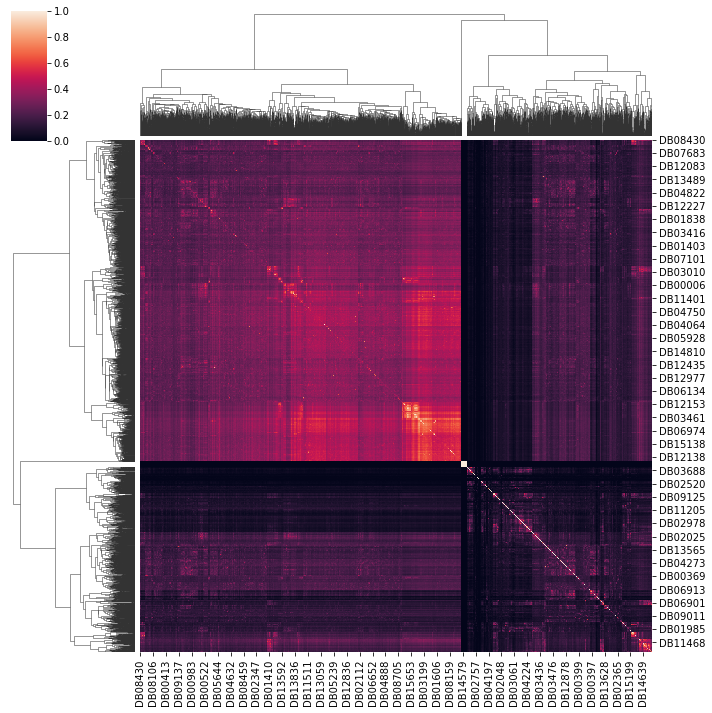

In [119]:
import matplotlib.pyplot as plt
import seaborn as sb
index = np.random.choice(np.arange(len(mols)), 5000)
plt.figure()
sb.clustermap(graph_smiles.iloc[index, index])
plt.savefig("/Users/cdonnat/Downloads/heatmap_smiles.png")

In [ ]:
no_cat/len(dictionary), no_atc/len(dictionary), no_smile/len(dictionary), no_class/len(dictionary),
      no_pathway/len(dictionary), no_ddi/len(dictionary), 
      no_carriers/len(dictionary), no_transporters/len(dictionary), no_indication/len(dictionary),
      no_targets/len(dictionary)

In [121]:
features = {}
list_all_cat = []
list_all_atc = []
for drug in dictionary.keys():
    features[drug] = { k :  dictionary[drug]['classification'][k] 
            for k in dictionary[drug]['classification'].keys()}
    list_all_cat += dictionary[drug]['categories']
    list_all_atc += dictionary[drug]['atc_hierarchy']
    
features_raw = pd.DataFrame.from_dict(features).T   
features = pd.get_dummies(features_raw["direct-parent"], prefix='direct-parent')
features = features.merge(pd.get_dummies(features_raw['kingdom'], prefix='kingdom'), right_index=True, left_index=True)
features = features.merge(pd.get_dummies(features_raw['superclass'], prefix='superclass'), right_index=True, left_index=True)    
features = features.merge(pd.get_dummies(features_raw['class'], prefix='class'), right_index=True, left_index=True)
features = features.merge(pd.get_dummies(features_raw['subclass'], prefix='subclass'), right_index=True, left_index=True)
    

In [122]:
additional_info = np.unique(list(np.unique(np.array(list_all_atc)[:,1])) + list(np.unique(np.array(list_all_cat)[:,0])))
additional_features = pd.DataFrame(np.zeros((features.shape[0], len(additional_info))), 
                                   columns =additional_info, index = features.index)
for drug in dictionary.keys():
    for uu in dictionary[drug]['categories']:
        additional_features.loc[drug][uu[0]] = 1
    for uu in dictionary[drug]['atc_hierarchy']:
        additional_features.loc[drug][uu[1]] = 1

In [123]:
features = features.merge(additional_features, right_index=True, left_index=True)

In [124]:
features.to_csv("~/Downloads/features_drugs.csv")

In [125]:
no_features = np.where(features.sum(1)==0)

In [126]:
features.sum(1)[no_features[0]]

DB01477    0.0
DB01640    0.0
DB01657    0.0
DB01666    0.0
DB01694    0.0
          ... 
DB16390    0.0
DB16397    0.0
DB16400    0.0
DB16406    0.0
DB16408    0.0
Length: 632, dtype: float64

In [129]:
features.columns

Index(['direct-parent_(3'-&gt;5')-dinucleotides',
       'direct-parent_(5'-&gt;5')-dinucleotides',
       'direct-parent_(R)-3-hydroxyacyl CoAs',
       'direct-parent_(S)-3-hydroxy-3-alkylglutaryl CoAs',
       'direct-parent_(S)-3-hydroxyacyl CoAs',
       'direct-parent_1,2,4-benzothiadiazine-1,1-dioxides',
       'direct-parent_1,2,4-triazolo[4,3-a][1,4]benzodiazepines',
       'direct-parent_1,2,4-trisubstituted imidazoles',
       'direct-parent_1,2-aminoalcohols',
       'direct-parent_1,2-diacylglycerol-3-phosphates',
       ...
       'yttrium', 'yttrium (90y) compounds', 'yttrium isotopes',
       'yttrium radioisotopes', 'zearalenone', 'zinc', 'zinc compounds',
       'zingiberaceae', 'zingiberales', 'zopiclone and prodrugs'],
      dtype='object', length=6617)

In [130]:
features = features.merge(pd.get_dummies(features_raw['kingdom'], prefix='kingdom'), 
                          right_index=True, left_index=True)


In [131]:
features.shape

(13239, 6620)

In [132]:
edges = pd.read_csv("~/Downloads/edges_uniprot.csv", sep=";")

In [133]:
edges

,src_type,src,dest_type,dest,direction,type,pathway,pathway_name
0,UNIPROT,P05108,CHEBI,16341,directed,Control(Out: ACTIVATION of BiochemicalReaction),SMP0000575,11-beta-Hydroxylase Deficiency (CYP11B1)
1,UNIPROT,P15538,CHEBI,16341,directed,Control(Out: ACTIVATION of BiochemicalReaction),SMP0000575,11-beta-Hydroxylase Deficiency (CYP11B1)
2,UNIPROT,P19099,CHEBI,16341,directed,Control(Out: ACTIVATION of BiochemicalReaction),SMP0000575,11-beta-Hydroxylase Deficiency (CYP11B1)
3,CHEBI,16906,UNIPROT,P05108,directed,Control(In: ACTIVATION of BiochemicalReaction),SMP0000575,11-beta-Hydroxylase Deficiency (CYP11B1)
4,CHEBI,16906,UNIPROT,P15538,directed,Control(In: ACTIVATION of BiochemicalReaction),SMP0000575,11-beta-Hydroxylase Deficiency (CYP11B1)
...,...,...,...,...,...,...,...,...
48427,UNIPROT,Q6P531,UNIPROT,P15144,directed,Control(indirect),SMP0000501,gamma-Glutamyltranspeptidase Deficiency
48428,UNIPROT,Q6P531,UNIPROT,P48506,directed,Control(indirect),SMP0000501,gamma-Glutamyltranspeptidase Deficiency
48429,UNIPROT,Q6P531,UNIPROT,P48507,directed,Control(indirect),SMP0000501,gamma-Glutamyltranspeptidase Deficiency
48430,UNIPROT,Q6P531,UNIPROT,P55210,directed,Control(indirect),SMP0000501,gamma-Glutamyltranspeptidase Deficiency


In [318]:
#### Now create a graph on 
##### We'll have to create the graph line by line

#### Start by adding the drug-drug interactions
#### Then add the Protein interactions
mapping_db = {i:k for i, k in enumerate(dictionary.keys())}
mapping_db_rev = {k:i for i, k in enumerate(dictionary.keys())}
mapping_uniprot = {}
pb = []
for i, k in enumerate(dictionary.keys()):
    try:
        mapping_uniprot[i]  = dictionary[k]['identifiers']['UniProtKB'] 
    except:
        #mapping_uniprot[i]  = ""
        print(k)
        pb += [k]
        
mapping_uniprot_rev = {}
for i, k in enumerate(dictionary.keys()):
    try:
        u = dictionary[k]['identifiers']['UniProtKB'] 
        mapping_uniprot_rev[u]  = k
    except:
        #mapping_uniprot[i]  = ""
        print(k)
        pb += [k]


        
mapping_chebi = {}
for i, k in enumerate(dictionary.keys()):
    try:
        mapping_chebi[i]  = dictionary[k]['identifiers']['ChEBI']
    except:
        print(k)
        
mapping_chebi_rev = {}
for i, k in enumerate(dictionary.keys()):
    try:
        u = dictionary[k]['identifiers']['ChEBI']
        mapping_chebi_rev[u]  = k
    except:
        print(k)
   


DB00057
DB00076
DB00080
DB00225
DB00236
DB00258
DB00265
DB00271
DB00326
DB00375
DB00442
DB00460
DB00488
DB00516
DB00538
DB00556
DB00566
DB00597
DB00639
DB00658
DB00660
DB00662
DB00676
DB00791
DB00793
DB00803
DB00832
DB00840
DB00853
DB00885
DB00930
DB00965
DB00971
DB00992
DB01111
DB01187
DB01230
DB01243
DB01249
DB01266
DB01322
DB01344
DB01362
DB01377
DB01423
DB01432
DB01434
DB01441
DB01443
DB01446
DB01447
DB01450
DB01451
DB01453
DB01455
DB01458
DB01459
DB01460
DB01461
DB01462
DB01464
DB01465
DB01467
DB01468
DB01469
DB01470
DB01471
DB01473
DB01474
DB01475
DB01476
DB01477
DB01478
DB01479
DB01480
DB01484
DB01485
DB01486
DB01487
DB01490
DB01491
DB01493
DB01494
DB01495
DB01498
DB01499
DB01500
DB01501
DB01502
DB01503
DB01505
DB01506
DB01509
DB01510
DB01512
DB01513
DB01514
DB01515
DB01516
DB01518
DB01521
DB01522
DB01523
DB01524
DB01525
DB01526
DB01527
DB01528
DB01529
DB01530
DB01531
DB01532
DB01533
DB01534
DB01538
DB01539
DB01540
DB01542
DB01543
DB01546
DB01547
DB01550
DB01552
DB01554
DB01555


DB10604
DB10605
DB10606
DB10607
DB10608
DB10609
DB10610
DB10612
DB10613
DB10614
DB10615
DB10616
DB10617
DB10619
DB10620
DB10621
DB10622
DB10623
DB10625
DB10626
DB10627
DB10629
DB10630
DB10631
DB10632
DB10633
DB10634
DB10635
DB10636
DB10637
DB10638
DB10639
DB10640
DB10642
DB10643
DB10644
DB10645
DB10646
DB10647
DB10648
DB10651
DB10652
DB10653
DB10654
DB10657
DB10658
DB10659
DB10660
DB10661
DB10662
DB10663
DB10664
DB10666
DB10667
DB10669
DB10670
DB10671
DB10672
DB10673
DB10674
DB10676
DB10677
DB10678
DB10681
DB10683
DB10686
DB10687
DB10688
DB10690
DB10691
DB10693
DB10694
DB10695
DB10696
DB10697
DB10698
DB10699
DB10701
DB10702
DB10703
DB10704
DB10705
DB10706
DB10707
DB10708
DB10710
DB10711
DB10712
DB10713
DB10714
DB10715
DB10716
DB10717
DB10718
DB10719
DB10720
DB10721
DB10722
DB10723
DB10724
DB10725
DB10727
DB10728
DB10729
DB10730
DB10731
DB10732
DB10734
DB10735
DB10736
DB10737
DB10738
DB10739
DB10740
DB10741
DB10742
DB10743
DB10744
DB10745
DB10746
DB10747
DB10748
DB10749
DB10750
DB10751


DB13965
DB13966
DB13968
DB13969
DB13970
DB13971
DB13972
DB13974
DB13976
DB13977
DB13982
DB13984
DB13987
DB13989
DB13990
DB13991
DB13992
DB13993
DB14000
DB14008
DB14015
DB14016
DB14020
DB14022
DB14026
DB14027
DB14030
DB14035
DB14037
DB14038
DB14043
DB14044
DB14045
DB14048
DB14049
DB14051
DB14052
DB14054
DB14056
DB14073
DB14075
DB14076
DB14077
DB14078
DB14079
DB14080
DB14081
DB14082
DB14083
DB14084
DB14085
DB14086
DB14087
DB14088
DB14089
DB14090
DB14091
DB14092
DB14093
DB14094
DB14096
DB14097
DB14098
DB14099
DB14102
DB14103
DB14104
DB14105
DB14106
DB14107
DB14108
DB14109
DB14110
DB14111
DB14112
DB14113
DB14115
DB14116
DB14119
DB14120
DB14121
DB14122
DB14124
DB14125
DB14127
DB14128
DB14129
DB14130
DB14131
DB14134
DB14135
DB14136
DB14137
DB14138
DB14139
DB14141
DB14142
DB14143
DB14144
DB14145
DB14148
DB14149
DB14150
DB14151
DB14152
DB14154
DB14156
DB14158
DB14159
DB14160
DB14162
DB14163
DB14164
DB14165
DB14166
DB14167
DB14168
DB14169
DB14170
DB14171
DB14172
DB14173
DB14174
DB14175
DB14176


DB16423
DB00057
DB00076
DB00080
DB00225
DB00236
DB00258
DB00265
DB00271
DB00326
DB00375
DB00442
DB00460
DB00488
DB00516
DB00538
DB00556
DB00566
DB00597
DB00639
DB00658
DB00660
DB00662
DB00676
DB00791
DB00793
DB00803
DB00832
DB00840
DB00853
DB00885
DB00930
DB00965
DB00971
DB00992
DB01111
DB01187
DB01230
DB01243
DB01249
DB01266
DB01322
DB01344
DB01362
DB01377
DB01423
DB01432
DB01434
DB01441
DB01443
DB01446
DB01447
DB01450
DB01451
DB01453
DB01455
DB01458
DB01459
DB01460
DB01461
DB01462
DB01464
DB01465
DB01467
DB01468
DB01469
DB01470
DB01471
DB01473
DB01474
DB01475
DB01476
DB01477
DB01478
DB01479
DB01480
DB01484
DB01485
DB01486
DB01487
DB01490
DB01491
DB01493
DB01494
DB01495
DB01498
DB01499
DB01500
DB01501
DB01502
DB01503
DB01505
DB01506
DB01509
DB01510
DB01512
DB01513
DB01514
DB01515
DB01516
DB01518
DB01521
DB01522
DB01523
DB01524
DB01525
DB01526
DB01527
DB01528
DB01529
DB01530
DB01531
DB01532
DB01533
DB01534
DB01538
DB01539
DB01540
DB01542
DB01543
DB01546
DB01547
DB01550
DB01552
DB01554


DB10730
DB10731
DB10732
DB10734
DB10735
DB10736
DB10737
DB10738
DB10739
DB10740
DB10741
DB10742
DB10743
DB10744
DB10745
DB10746
DB10747
DB10748
DB10749
DB10750
DB10751
DB10752
DB10753
DB10754
DB10755
DB10756
DB10757
DB10758
DB10759
DB10760
DB10761
DB10762
DB10763
DB10764
DB10765
DB10766
DB10767
DB10768
DB10769
DB10771
DB10787
DB10788
DB10789
DB10790
DB10794
DB10795
DB10796
DB10797
DB10798
DB10799
DB10800
DB10801
DB10803
DB10804
DB10805
DB10806
DB10807
DB10808
DB10809
DB10810
DB10811
DB10812
DB10813
DB10814
DB10815
DB10816
DB10817
DB10818
DB10819
DB10820
DB10822
DB10823
DB10824
DB10825
DB10826
DB10827
DB10828
DB10829
DB10830
DB10831
DB10832
DB10833
DB10834
DB10835
DB10836
DB10837
DB10838
DB10839
DB10840
DB10841
DB10842
DB10843
DB10844
DB10845
DB10846
DB10847
DB10848
DB10849
DB10850
DB10851
DB10852
DB10856
DB10857
DB10858
DB10859
DB10860
DB10861
DB10862
DB10864
DB10865
DB10866
DB10867
DB10870
DB10871
DB10872
DB10873
DB10875
DB10876
DB10877
DB10879
DB10880
DB10881
DB10882
DB10883
DB10885


DB13103
DB13104
DB13105
DB13106
DB13107
DB13108
DB13109
DB13110
DB13111
DB13112
DB13113
DB13114
DB13115
DB13116
DB13117
DB13118
DB13120
DB13121
DB13122
DB13123
DB13124
DB13126
DB13127
DB13128
DB13129
DB13131
DB13134
DB13135
DB13137
DB13138
DB13142
DB13143
DB13145
DB13147
DB13148
DB13156
DB13157
DB13160
DB13163
DB13169
DB13171
DB13172
DB13175
DB13177
DB13180
DB13181
DB13182
DB13183
DB13185
DB13189
DB13190
DB13193
DB13194
DB13195
DB13196
DB13197
DB13198
DB13199
DB13201
DB13202
DB13204
DB13205
DB13206
DB13207
DB13209
DB13210
DB13211
DB13212
DB13213
DB13214
DB13215
DB13216
DB13217
DB13218
DB13219
DB13220
DB13221
DB13222
DB13223
DB13224
DB13225
DB13226
DB13227
DB13228
DB13229
DB13230
DB13231
DB13232
DB13233
DB13234
DB13235
DB13236
DB13237
DB13238
DB13239
DB13240
DB13241
DB13242
DB13243
DB13244
DB13245
DB13246
DB13247
DB13248
DB13249
DB13250
DB13251
DB13252
DB13253
DB13254
DB13255
DB13256
DB13258
DB13259
DB13260
DB13262
DB13263
DB13264
DB13265
DB13266
DB13267
DB13268
DB13270
DB13271
DB13272


DB15499
DB15503
DB15504
DB15511
DB15512
DB15525
DB15526
DB15527
DB15528
DB15529
DB15530
DB15531
DB15532
DB15533
DB15535
DB15536
DB15538
DB15541
DB15542
DB15547
DB15549
DB15550
DB15551
DB15552
DB15553
DB15554
DB15555
DB15556
DB15557
DB15559
DB15560
DB15571
DB15573
DB15574
DB15575
DB15576
DB15578
DB15579
DB15580
DB15581
DB15582
DB15583
DB15584
DB15585
DB15586
DB15587
DB15588
DB15589
DB15590
DB15594
DB15595
DB15596
DB15597
DB15601
DB15609
DB15610
DB15612
DB15614
DB15618
DB15619
DB15622
DB15626
DB15628
DB15629
DB15630
DB15631
DB15632
DB15633
DB15634
DB15635
DB15636
DB15637
DB15638
DB15639
DB15640
DB15641
DB15642
DB15644
DB15645
DB15646
DB15648
DB15649
DB15651
DB15652
DB15653
DB15654
DB15655
DB15656
DB15657
DB15658
DB15659
DB15660
DB15661
DB15662
DB15664
DB15666
DB15668
DB15669
DB15670
DB15671
DB15672
DB15673
DB15674
DB15675
DB15676
DB15677
DB15678
DB15679
DB15684
DB15687
DB15692
DB15693
DB15695
DB15697
DB15698
DB15717
DB15720
DB15736
DB15741
DB15746
DB15747
DB15748
DB15749
DB15750
DB15752


DB03194
DB03195
DB03196
DB03197
DB03198
DB03199
DB03200
DB03202
DB03207
DB03208
DB03210
DB03211
DB03212
DB03213
DB03216
DB03217
DB03218
DB03219
DB03220
DB03221
DB03224
DB03228
DB03230
DB03231
DB03233
DB03234
DB03235
DB03236
DB03238
DB03239
DB03240
DB03241
DB03242
DB03243
DB03244
DB03245
DB03248
DB03249
DB03250
DB03251
DB03254
DB03256
DB03257
DB03262
DB03263
DB03267
DB03268
DB03269
DB03272
DB03273
DB03274
DB03275
DB03276
DB03279
DB03280
DB03281
DB03284
DB03286
DB03287
DB03288
DB03289
DB03290
DB03291
DB03292
DB03293
DB03294
DB03296
DB03297
DB03299
DB03301
DB03305
DB03306
DB03307
DB03308
DB03311
DB03312
DB03314
DB03318
DB03319
DB03321
DB03325
DB03326
DB03327
DB03330
DB03331
DB03332
DB03333
DB03335
DB03336
DB03337
DB03338
DB03339
DB03340
DB03341
DB03342
DB03343
DB03344
DB03348
DB03349
DB03351
DB03352
DB03353
DB03355
DB03358
DB03363
DB03365
DB03367
DB03370
DB03371
DB03372
DB03373
DB03376
DB03379
DB03383
DB03384
DB03386
DB03387
DB03388
DB03390
DB03391
DB03392
DB03393
DB03396
DB03399
DB03400


DB07065
DB07066
DB07068
DB07070
DB07071
DB07073
DB07074
DB07075
DB07076
DB07077
DB07078
DB07079
DB07080
DB07081
DB07082
DB07083
DB07084
DB07085
DB07086
DB07087
DB07088
DB07089
DB07090
DB07091
DB07092
DB07093
DB07094
DB07095
DB07097
DB07098
DB07099
DB07100
DB07102
DB07103
DB07104
DB07105
DB07106
DB07107
DB07108
DB07110
DB07111
DB07112
DB07113
DB07114
DB07115
DB07116
DB07117
DB07119
DB07120
DB07121
DB07122
DB07123
DB07124
DB07125
DB07126
DB07128
DB07129
DB07130
DB07131
DB07132
DB07133
DB07134
DB07135
DB07136
DB07137
DB07139
DB07140
DB07141
DB07142
DB07143
DB07144
DB07146
DB07147
DB07148
DB07149
DB07150
DB07151
DB07152
DB07153
DB07154
DB07156
DB07157
DB07158
DB07160
DB07161
DB07162
DB07163
DB07164
DB07165
DB07167
DB07168
DB07169
DB07170
DB07171
DB07172
DB07173
DB07174
DB07175
DB07176
DB07177
DB07178
DB07179
DB07180
DB07181
DB07182
DB07183
DB07185
DB07186
DB07187
DB07188
DB07189
DB07190
DB07192
DB07193
DB07194
DB07195
DB07196
DB07197
DB07198
DB07199
DB07200
DB07201
DB07202
DB07203
DB07204


DB09511
DB09512
DB09517
DB09535
DB09539
DB09546
DB09551
DB09559
DB09561
DB09564
DB09567
DB09568
DB10062
DB10076
DB10276
DB10283
DB10286
DB10287
DB10288
DB10289
DB10290
DB10291
DB10292
DB10293
DB10294
DB10295
DB10296
DB10297
DB10298
DB10299
DB10300
DB10301
DB10302
DB10315
DB10316
DB10317
DB10318
DB10319
DB10320
DB10321
DB10322
DB10323
DB10324
DB10325
DB10326
DB10327
DB10328
DB10329
DB10330
DB10331
DB10332
DB10333
DB10334
DB10335
DB10336
DB10337
DB10338
DB10339
DB10340
DB10341
DB10342
DB10343
DB10344
DB10345
DB10346
DB10348
DB10349
DB10350
DB10351
DB10352
DB10353
DB10354
DB10355
DB10356
DB10357
DB10359
DB10360
DB10361
DB10362
DB10363
DB10364
DB10365
DB10366
DB10368
DB10369
DB10370
DB10371
DB10372
DB10373
DB10374
DB10375
DB10376
DB10377
DB10378
DB10379
DB10380
DB10381
DB10382
DB10383
DB10384
DB10385
DB10386
DB10387
DB10388
DB10389
DB10390
DB10391
DB10392
DB10393
DB10394
DB10395
DB10396
DB10397
DB10398
DB10399
DB10400
DB10401
DB10403
DB10404
DB10406
DB10408
DB10409
DB10410
DB10411
DB10412


DB12804
DB12805
DB12806
DB12807
DB12808
DB12809
DB12810
DB12812
DB12813
DB12814
DB12815
DB12817
DB12818
DB12819
DB12820
DB12822
DB12823
DB12824
DB12825
DB12826
DB12827
DB12829
DB12830
DB12835
DB12836
DB12837
DB12839
DB12840
DB12841
DB12842
DB12844
DB12845
DB12849
DB12850
DB12851
DB12852
DB12853
DB12854
DB12855
DB12857
DB12858
DB12861
DB12862
DB12866
DB12871
DB12872
DB12873
DB12875
DB12876
DB12878
DB12880
DB12882
DB12883
DB12885
DB12886
DB12887
DB12888
DB12889
DB12890
DB12891
DB12892
DB12893
DB12894
DB12895
DB12896
DB12897
DB12898
DB12899
DB12900
DB12901
DB12903
DB12905
DB12906
DB12908
DB12909
DB12910
DB12912
DB12914
DB12917
DB12919
DB12920
DB12921
DB12925
DB12928
DB12929
DB12932
DB12933
DB12934
DB12935
DB12937
DB12941
DB12943
DB12948
DB12949
DB12950
DB12952
DB12953
DB12955
DB12956
DB12957
DB12959
DB12960
DB12962
DB12963
DB12964
DB12968
DB12971
DB12973
DB12974
DB12976
DB12977
DB12981
DB12984
DB12986
DB12987
DB12988
DB12989
DB12990
DB12991
DB12992
DB12994
DB12997
DB12998
DB12999
DB13000


DB00056
DB00057
DB00058
DB00059
DB00060
DB00061
DB00062
DB00063
DB00065
DB00066
DB00067
DB00068
DB00069
DB00070
DB00071
DB00072
DB00073
DB00074
DB00075
DB00076
DB00078
DB00081
DB00082
DB00083
DB00085
DB00086
DB00087
DB00088
DB00089
DB00090
DB00092
DB00094
DB00095
DB00097
DB00098
DB00099
DB00100
DB00102
DB00103
DB00104
DB00105
DB00107
DB00108
DB00109
DB00110
DB00111
DB00112
DB00113
DB00212
DB00265
DB00336
DB00364
DB00375
DB00407
DB00444
DB00460
DB00466
DB00483
DB00486
DB00516
DB00552
DB00570
DB00596
DB00602
DB00644
DB00658
DB00666
DB00686
DB00702
DB00710
DB00743
DB00757
DB00768
DB00785
DB00803
DB00826
DB00837
DB00840
DB00893
DB00930
DB00965
DB01046
DB01169
DB01187
DB01225
DB01250
DB01256
DB01257
DB01266
DB01269
DB01270
DB01271
DB01272
DB01276
DB01277
DB01279
DB01281
DB01285
DB01303
DB01306
DB01307
DB01309
DB01322
DB01323
DB01346
DB01347
DB01363
DB01366
DB01369
DB01381
DB01401
DB01404
DB01432
DB01442
DB01443
DB01447
DB01450
DB01453
DB01455
DB01458
DB01460
DB01462
DB01464
DB01465
DB01467


DB04689
DB04691
DB04692
DB04693
DB04694
DB04695
DB04696
DB04697
DB04698
DB04700
DB04702
DB04704
DB04707
DB04708
DB04709
DB04710
DB04712
DB04715
DB04717
DB04718
DB04719
DB04720
DB04721
DB04722
DB04723
DB04724
DB04725
DB04727
DB04731
DB04732
DB04733
DB04738
DB04739
DB04740
DB04742
DB04748
DB04749
DB04752
DB04753
DB04754
DB04755
DB04756
DB04757
DB04758
DB04759
DB04760
DB04762
DB04763
DB04764
DB04765
DB04767
DB04769
DB04770
DB04771
DB04772
DB04773
DB04774
DB04775
DB04776
DB04777
DB04779
DB04782
DB04783
DB04787
DB04788
DB04789
DB04790
DB04791
DB04792
DB04793
DB04795
DB04796
DB04798
DB04799
DB04800
DB04802
DB04803
DB04804
DB04807
DB04809
DB04810
DB04811
DB04850
DB04852
DB04853
DB04857
DB04859
DB04860
DB04862
DB04866
DB04869
DB04870
DB04872
DB04873
DB04874
DB04875
DB04877
DB04881
DB04882
DB04883
DB04885
DB04887
DB04888
DB04889
DB04891
DB04892
DB04894
DB04895
DB04897
DB04899
DB04900
DB04901
DB04903
DB04904
DB04907
DB04909
DB04912
DB04914
DB04915
DB04917
DB04919
DB04921
DB04923
DB04925
DB04926


DB07704
DB07707
DB07708
DB07710
DB07712
DB07713
DB07714
DB07717
DB07719
DB07721
DB07722
DB07723
DB07724
DB07728
DB07729
DB07730
DB07731
DB07732
DB07733
DB07734
DB07735
DB07736
DB07737
DB07738
DB07739
DB07740
DB07741
DB07742
DB07744
DB07745
DB07746
DB07747
DB07748
DB07749
DB07750
DB07751
DB07753
DB07754
DB07755
DB07756
DB07757
DB07758
DB07759
DB07760
DB07761
DB07762
DB07763
DB07765
DB07766
DB07769
DB07770
DB07771
DB07772
DB07773
DB07779
DB07781
DB07782
DB07783
DB07784
DB07785
DB07786
DB07787
DB07788
DB07789
DB07790
DB07791
DB07792
DB07793
DB07796
DB07797
DB07798
DB07800
DB07801
DB07803
DB07804
DB07805
DB07807
DB07808
DB07809
DB07812
DB07813
DB07817
DB07818
DB07819
DB07821
DB07823
DB07824
DB07825
DB07826
DB07827
DB07829
DB07830
DB07831
DB07832
DB07834
DB07836
DB07837
DB07838
DB07839
DB07840
DB07842
DB07843
DB07844
DB07845
DB07846
DB07847
DB07848
DB07849
DB07850
DB07851
DB07852
DB07853
DB07854
DB07855
DB07856
DB07857
DB07858
DB07860
DB07861
DB07862
DB07864
DB07865
DB07866
DB07867
DB07868


DB11476
DB11479
DB11480
DB11481
DB11482
DB11485
DB11487
DB11493
DB11499
DB11501
DB11505
DB11507
DB11509
DB11510
DB11520
DB11525
DB11528
DB11529
DB11530
DB11531
DB11534
DB11537
DB11540
DB11542
DB11543
DB11545
DB11554
DB11555
DB11556
DB11563
DB11564
DB11567
DB11568
DB11569
DB11571
DB11572
DB11573
DB11578
DB11579
DB11580
DB11585
DB11587
DB11592
DB11593
DB11595
DB11597
DB11598
DB11599
DB11600
DB11601
DB11603
DB11604
DB11606
DB11607
DB11608
DB11621
DB11624
DB11626
DB11627
DB11631
DB11634
DB11635
DB11639
DB11643
DB11645
DB11646
DB11647
DB11649
DB11650
DB11652
DB11653
DB11654
DB11655
DB11657
DB11658
DB11660
DB11661
DB11665
DB11668
DB11669
DB11670
DB11671
DB11676
DB11677
DB11679
DB11680
DB11681
DB11682
DB11683
DB11684
DB11685
DB11686
DB11687
DB11688
DB11690
DB11691
DB11694
DB11697
DB11700
DB11701
DB11702
DB11703
DB11704
DB11706
DB11707
DB11708
DB11709
DB11711
DB11712
DB11713
DB11714
DB11715
DB11716
DB11717
DB11718
DB11719
DB11723
DB11724
DB11726
DB11727
DB11729
DB11730
DB11731
DB11732
DB11734


DB14795
DB14797
DB14799
DB14801
DB14802
DB14803
DB14804
DB14805
DB14806
DB14807
DB14808
DB14809
DB14810
DB14811
DB14812
DB14813
DB14814
DB14821
DB14822
DB14823
DB14824
DB14825
DB14828
DB14829
DB14830
DB14832
DB14835
DB14836
DB14839
DB14840
DB14841
DB14843
DB14844
DB14845
DB14846
DB14849
DB14850
DB14852
DB14854
DB14855
DB14856
DB14857
DB14859
DB14860
DB14862
DB14864
DB14865
DB14866
DB14867
DB14868
DB14869
DB14870
DB14871
DB14872
DB14875
DB14876
DB14877
DB14878
DB14879
DB14880
DB14881
DB14882
DB14883
DB14885
DB14886
DB14887
DB14888
DB14889
DB14890
DB14891
DB14892
DB14894
DB14896
DB14897
DB14898
DB14899
DB14900
DB14901
DB14902
DB14903
DB14905
DB14906
DB14907
DB14908
DB14909
DB14911
DB14913
DB14914
DB14916
DB14917
DB14918
DB14919
DB14921
DB14922
DB14923
DB14924
DB14925
DB14927
DB14929
DB14930
DB14931
DB14932
DB14934
DB14935
DB14936
DB14937
DB14940
DB14941
DB14942
DB14943
DB14944
DB14945
DB14946
DB14947
DB14948
DB14949
DB14950
DB14951
DB14952
DB14953
DB14955
DB14956
DB14957
DB14959
DB14961


In [154]:
import copy
mapping_db = {i:k for i, k in enumerate(dictionary.keys())}
G = nx.Graph()
for i, k in enumerate(dictionary.keys()):
    G.add_node(i, name=k)
mapping_db_rev = {k:i for i, k in enumerate(dictionary.keys())}
new_edges = copy.deepcopy(edges)
a = len(mapping_db)
list_edges = {}

for i in range(new_edges.shape[0]):
    u = new_edges["src"][i]
    v = new_edges["dest"][i]
    if new_edges["src_type"][i]=="UNIPROT":
        if u in mapping_uniprot_rev.keys():
            new_edges["src"][i] = mapping_db_rev[mapping_uniprot_rev[u]]
        elif u in mapping_db_rev.keys():
            uu = mapping_db_rev[u]
            new_edges["src"][i] = uu
        else:
            new_edges["src"][i] = a
            mapping_db[a] = u
            mapping_db_rev[u] = a
            G.add_node(a, name=new_edges["src_type"][i] + '_' + str(u))
            a += 1
            
    elif new_edges["src_type"][i]=="CHEBI":
        if u in mapping_chebi_rev.keys():
            new_edges["src"][i] = mapping_db_rev[mapping_chebi_rev[u]]
            uu = mapping_db_rev[mapping_chebi_rev[u]]
        elif u in mapping_db_rev.keys():
            uu = mapping_db_rev[u]
            new_edges["src"][i] = uu
        else:
            new_edges["src"][i] = a
            mapping_db[a] = u
            mapping_db_rev[u] = a
            G.add_node(a, name=str(u))
            a += 1

    
    if new_edges["dest_type"][i]=="UNIPROT":
        if v in mapping_uniprot_rev.keys():
            new_edges["dest"][i] = mapping_db_rev[mapping_uniprot_rev[v]]
        elif v in mapping_db_rev.keys():
            new_edges["dest"][i] = mapping_db_rev[v]
        else:
            new_edges["dest"][i] = a
            mapping_db[a] = v 
            mapping_db_rev[v] = a
            G.add_node(a, name=str(v))
            a += 1
    elif new_edges["dest_type"][i]=="CHEBI":
        if v in mapping_chebi_rev.keys():
            new_edges["dest"][i] = mapping_db_rev[mapping_chebi_rev[v]]
        elif v in mapping_db_rev.keys():
            new_edges["dest"][i] = mapping_db_rev[v]
        else:
            new_edges["dest"][i] = a
            mapping_db[a] = v 
            mapping_db_rev[v] = a
            G.add_node(a, name=str(v))
            a += 1
    if (new_edges["type"][i] in list_edges.keys())==False:
        list_edges[new_edges["type"][i]] = []
        
    list_edges[new_edges["type"][i]] += [[int(new_edges["src"][i]), int(new_edges["dest"][i])]]
    if edges["direction"][i] == "undirected":
        list_edges[new_edges["type"][i]] += [[int(new_edges["dest"][i]), int(new_edges["src"][i])]]

In [155]:
len(list_edges['Control(Out: ACTIVATION of BiochemicalReaction)'])

780

In [157]:
np.unique(edges["type"])

array(['Binding', 'Control(In: ACTIVATION of BiochemicalReaction)',
       'Control(In: ACTIVATION of Transport)',
       'Control(Out: ACTIVATION of BiochemicalReaction)',
       'Control(Out: ACTIVATION of Transport)', 'Control(indirect)',
       'Process(BiochemicalReaction)', 'Process(indirect)'], dtype=object)

In [158]:
### Create Y
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add("may")
name_drugs = {k : dictionary[k]['name'].lower() for k in dictionary.keys()}

no_go_words = ["-uracil", " 400", "I-131"]
### Create the labels:
type_interaction = ""
seen_interactions = []
clusters = []
ddi_edges = []
#### Need to create a cluster analysis

new_it = 0
for it, k in enumerate(dictionary.keys()):
    print(k)
    old_int = ""
    if len(dictionary[k]['ddi']) > 0:
        for key2 in dictionary[k]['ddi'].keys():
            new_int = dictionary[k]['ddi'][key2]['description'].replace(dictionary[k]['name'], "drugA")
            new_int = new_int.replace(dictionary[k]['ddi'][key2]['name'], "drugB")
            ddi_edges += [[k, key2]]
            if new_int not in seen_interactions:
                seen_interactions += [new_int]
                clusters += [[it, new_it, ]]
                new_it += 1
                type_interaction += new_int.lower()
            else:
                j = np.where([new_int == s for s in seen_interactions])[0][0]
                clusters += [[it, j]]
                
                
#### Usef            
type_interaction = re.split('\W+', type_interaction.lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cdonnat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


DB00001
DB00002
DB00003
DB00004
DB00005
DB00006
DB00007
DB00008
DB00009
DB00010
DB00011
DB00012
DB00013
DB00014
DB00015
DB00016
DB00017
DB00018
DB00019
DB00020
DB00022
DB00023
DB00024
DB00025
DB00026
DB00027
DB00028
DB00029
DB00030
DB00031
DB00032
DB00033
DB00034
DB00035
DB00036
DB00038
DB00039
DB00040
DB00041
DB00042
DB00043
DB00044
DB00045
DB00046
DB00047
DB00048
DB00049
DB00050
DB00051
DB00052
DB00053
DB00054
DB00055
DB00056
DB00057
DB00058
DB00059
DB00060
DB00061
DB00062
DB00063
DB00065
DB00066
DB00067
DB00068
DB00069
DB00070
DB00071
DB00072
DB00073
DB00074
DB00075
DB00076
DB00078
DB00080
DB00081
DB00082
DB00083
DB00085
DB00086
DB00087
DB00088
DB00089
DB00090
DB00091
DB00092
DB00093
DB00094
DB00095
DB00097
DB00098
DB00099
DB00100
DB00102
DB00103
DB00104
DB00105
DB00106
DB00107
DB00108
DB00109
DB00110
DB00111
DB00112
DB00113
DB00114
DB00115
DB00116
DB00117
DB00118
DB00119
DB00120
DB00121
DB00122
DB00123
DB00125
DB00126
DB00127
DB00128
DB00129
DB00130
DB00131
DB00132
DB00133
DB00134


DB01045
DB01046
DB01047
DB01048
DB01049
DB01050
DB01051
DB01053
DB01054
DB01055
DB01056
DB01057
DB01058
DB01059
DB01060
DB01061
DB01062
DB01063
DB01064
DB01065
DB01066
DB01067
DB01068
DB01069
DB01070
DB01071
DB01072
DB01073
DB01074
DB01075
DB01076
DB01077
DB01078
DB01079
DB01080
DB01081
DB01082
DB01083
DB01084
DB01085
DB01086
DB01087
DB01088
DB01089
DB01090
DB01091
DB01092
DB01093
DB01094
DB01095
DB01096
DB01097
DB01098
DB01099
DB01100
DB01101
DB01102
DB01103
DB01104
DB01105
DB01106
DB01107
DB01108
DB01109
DB01110
DB01111
DB01112
DB01113
DB01114
DB01115
DB01116
DB01117
DB01118
DB01119
DB01120
DB01121
DB01122
DB01123
DB01124
DB01125
DB01126
DB01127
DB01128
DB01129
DB01130
DB01131
DB01132
DB01133
DB01134
DB01135
DB01136
DB01137
DB01138
DB01139
DB01140
DB01141
DB01142
DB01143
DB01144
DB01145
DB01146
DB01147
DB01148
DB01149
DB01150
DB01151
DB01152
DB01153
DB01154
DB01155
DB01156
DB01157
DB01158
DB01159
DB01160
DB01161
DB01162
DB01163
DB01164
DB01165
DB01166
DB01167
DB01168
DB01169
DB01170


DB02188
DB02189
DB02190
DB02191
DB02192
DB02194
DB02195
DB02196
DB02197
DB02198
DB02199
DB02200
DB02201
DB02202
DB02203
DB02205
DB02207
DB02209
DB02210
DB02211
DB02213
DB02214
DB02215
DB02216
DB02217
DB02218
DB02219
DB02220
DB02221
DB02222
DB02223
DB02224
DB02225
DB02226
DB02227
DB02228
DB02229
DB02230
DB02232
DB02233
DB02234
DB02235
DB02236
DB02237
DB02238
DB02239
DB02240
DB02241
DB02242
DB02243
DB02245
DB02247
DB02248
DB02249
DB02251
DB02252
DB02253
DB02254
DB02255
DB02256
DB02257
DB02258
DB02259
DB02260
DB02261
DB02262
DB02263
DB02264
DB02265
DB02266
DB02267
DB02268
DB02269
DB02270
DB02271
DB02272
DB02273
DB02274
DB02275
DB02276
DB02277
DB02278
DB02279
DB02280
DB02281
DB02282
DB02283
DB02285
DB02286
DB02287
DB02288
DB02289
DB02290
DB02292
DB02293
DB02294
DB02295
DB02296
DB02297
DB02298
DB02299
DB02300
DB02301
DB02302
DB02303
DB02304
DB02305
DB02306
DB02307
DB02308
DB02309
DB02310
DB02311
DB02312
DB02313
DB02314
DB02315
DB02316
DB02317
DB02318
DB02319
DB02320
DB02321
DB02322
DB02323


DB03451
DB03452
DB03453
DB03454
DB03455
DB03456
DB03458
DB03459
DB03460
DB03461
DB03462
DB03464
DB03466
DB03467
DB03468
DB03469
DB03470
DB03471
DB03472
DB03473
DB03474
DB03475
DB03476
DB03477
DB03478
DB03479
DB03480
DB03481
DB03482
DB03483
DB03484
DB03485
DB03486
DB03487
DB03488
DB03489
DB03490
DB03491
DB03492
DB03493
DB03495
DB03496
DB03497
DB03498
DB03499
DB03500
DB03501
DB03502
DB03503
DB03504
DB03505
DB03506
DB03507
DB03508
DB03509
DB03510
DB03511
DB03512
DB03513
DB03514
DB03515
DB03516
DB03517
DB03518
DB03520
DB03522
DB03523
DB03524
DB03525
DB03526
DB03528
DB03530
DB03531
DB03532
DB03533
DB03534
DB03535
DB03536
DB03537
DB03539
DB03540
DB03541
DB03542
DB03543
DB03544
DB03546
DB03548
DB03549
DB03550
DB03551
DB03552
DB03553
DB03554
DB03555
DB03556
DB03557
DB03558
DB03559
DB03560
DB03562
DB03564
DB03565
DB03566
DB03567
DB03568
DB03569
DB03570
DB03571
DB03572
DB03573
DB03574
DB03575
DB03576
DB03577
DB03578
DB03581
DB03582
DB03583
DB03584
DB03585
DB03586
DB03587
DB03588
DB03589
DB03590


DB04574
DB04575
DB04576
DB04577
DB04578
DB04579
DB04580
DB04581
DB04582
DB04583
DB04584
DB04585
DB04586
DB04587
DB04588
DB04590
DB04591
DB04592
DB04593
DB04594
DB04595
DB04596
DB04597
DB04598
DB04599
DB04600
DB04601
DB04602
DB04603
DB04604
DB04605
DB04606
DB04607
DB04608
DB04609
DB04610
DB04612
DB04613
DB04614
DB04615
DB04616
DB04617
DB04618
DB04619
DB04620
DB04622
DB04623
DB04624
DB04626
DB04627
DB04628
DB04629
DB04630
DB04631
DB04632
DB04633
DB04634
DB04636
DB04637
DB04638
DB04639
DB04640
DB04641
DB04642
DB04643
DB04644
DB04645
DB04646
DB04647
DB04648
DB04649
DB04650
DB04651
DB04652
DB04653
DB04654
DB04655
DB04656
DB04657
DB04658
DB04659
DB04660
DB04661
DB04662
DB04663
DB04664
DB04665
DB04666
DB04667
DB04668
DB04669
DB04671
DB04672
DB04673
DB04674
DB04676
DB04677
DB04678
DB04679
DB04680
DB04681
DB04682
DB04683
DB04684
DB04685
DB04686
DB04687
DB04688
DB04689
DB04690
DB04691
DB04692
DB04693
DB04694
DB04695
DB04696
DB04697
DB04698
DB04699
DB04700
DB04701
DB04702
DB04703
DB04704
DB04705


DB06413
DB06414
DB06415
DB06419
DB06420
DB06421
DB06422
DB06423
DB06429
DB06431
DB06433
DB06434
DB06435
DB06436
DB06437
DB06439
DB06440
DB06441
DB06442
DB06444
DB06445
DB06446
DB06447
DB06448
DB06451
DB06454
DB06455
DB06457
DB06458
DB06460
DB06461
DB06462
DB06465
DB06467
DB06468
DB06469
DB06470
DB06471
DB06472
DB06474
DB06475
DB06477
DB06478
DB06479
DB06480
DB06481
DB06485
DB06486
DB06492
DB06493
DB06494
DB06495
DB06496
DB06497
DB06499
DB06503
DB06504
DB06506
DB06508
DB06510
DB06511
DB06512
DB06515
DB06518
DB06519
DB06521
DB06523
DB06525
DB06527
DB06529
DB06530
DB06532
DB06533
DB06534
DB06535
DB06536
DB06538
DB06543
DB06545
DB06548
DB06549
DB06550
DB06552
DB06554
DB06555
DB06556
DB06557
DB06558
DB06560
DB06562
DB06569
DB06573
DB06575
DB06576
DB06578
DB06579
DB06580
DB06581
DB06582
DB06584
DB06585
DB06586
DB06587
DB06588
DB06589
DB06590
DB06592
DB06594
DB06595
DB06597
DB06598
DB06599
DB06600
DB06602
DB06603
DB06604
DB06605
DB06606
DB06607
DB06608
DB06609
DB06610
DB06611
DB06612
DB06614


DB07573
DB07574
DB07575
DB07577
DB07578
DB07579
DB07580
DB07581
DB07582
DB07583
DB07584
DB07585
DB07586
DB07587
DB07588
DB07589
DB07590
DB07591
DB07592
DB07593
DB07594
DB07595
DB07596
DB07597
DB07598
DB07599
DB07601
DB07602
DB07603
DB07604
DB07605
DB07606
DB07607
DB07608
DB07609
DB07610
DB07611
DB07612
DB07613
DB07614
DB07615
DB07616
DB07617
DB07618
DB07619
DB07620
DB07621
DB07622
DB07623
DB07624
DB07625
DB07626
DB07627
DB07628
DB07629
DB07630
DB07631
DB07632
DB07633
DB07634
DB07635
DB07636
DB07637
DB07638
DB07639
DB07640
DB07641
DB07642
DB07643
DB07644
DB07645
DB07646
DB07647
DB07648
DB07649
DB07650
DB07651
DB07652
DB07653
DB07654
DB07655
DB07657
DB07658
DB07659
DB07660
DB07661
DB07662
DB07663
DB07664
DB07665
DB07666
DB07667
DB07668
DB07669
DB07670
DB07671
DB07672
DB07673
DB07674
DB07675
DB07676
DB07677
DB07678
DB07679
DB07680
DB07681
DB07683
DB07684
DB07685
DB07686
DB07687
DB07688
DB07689
DB07691
DB07692
DB07693
DB07694
DB07695
DB07696
DB07697
DB07698
DB07700
DB07701
DB07702
DB07703


DB08736
DB08737
DB08738
DB08739
DB08740
DB08741
DB08742
DB08743
DB08744
DB08745
DB08746
DB08747
DB08748
DB08749
DB08750
DB08751
DB08752
DB08753
DB08754
DB08755
DB08756
DB08757
DB08758
DB08759
DB08760
DB08761
DB08762
DB08763
DB08765
DB08766
DB08767
DB08768
DB08770
DB08771
DB08772
DB08773
DB08774
DB08775
DB08776
DB08777
DB08778
DB08779
DB08780
DB08781
DB08782
DB08783
DB08784
DB08785
DB08786
DB08787
DB08788
DB08789
DB08790
DB08791
DB08792
DB08794
DB08795
DB08796
DB08797
DB08798
DB08799
DB08800
DB08801
DB08802
DB08803
DB08804
DB08805
DB08806
DB08807
DB08808
DB08809
DB08810
DB08811
DB08813
DB08814
DB08815
DB08816
DB08818
DB08819
DB08820
DB08822
DB08823
DB08824
DB08826
DB08827
DB08828
DB08830
DB08831
DB08833
DB08834
DB08835
DB08836
DB08837
DB08838
DB08839
DB08840
DB08841
DB08842
DB08843
DB08844
DB08845
DB08846
DB08847
DB08848
DB08849
DB08855
DB08856
DB08857
DB08858
DB08860
DB08861
DB08862
DB08864
DB08865
DB08867
DB08868
DB08869
DB08870
DB08871
DB08872
DB08873
DB08874
DB08875
DB08876
DB08877


DB10805
DB10806
DB10807
DB10808
DB10809
DB10810
DB10811
DB10812
DB10813
DB10814
DB10815
DB10816
DB10817
DB10818
DB10819
DB10820
DB10822
DB10823
DB10824
DB10825
DB10826
DB10827
DB10828
DB10829
DB10830
DB10831
DB10832
DB10833
DB10834
DB10835
DB10836
DB10837
DB10838
DB10839
DB10840
DB10841
DB10842
DB10843
DB10844
DB10845
DB10846
DB10847
DB10848
DB10849
DB10850
DB10851
DB10852
DB10856
DB10857
DB10858
DB10859
DB10860
DB10861
DB10862
DB10864
DB10865
DB10866
DB10867
DB10870
DB10871
DB10872
DB10873
DB10875
DB10876
DB10877
DB10879
DB10880
DB10881
DB10882
DB10883
DB10885
DB10886
DB10887
DB10888
DB10889
DB10890
DB10891
DB10892
DB10893
DB10894
DB10895
DB10896
DB10897
DB10898
DB10899
DB10900
DB10901
DB10902
DB10904
DB10905
DB10907
DB10908
DB10909
DB10910
DB10911
DB10912
DB10914
DB10915
DB10917
DB10918
DB10919
DB10921
DB10922
DB10923
DB10924
DB10925
DB10926
DB10927
DB10928
DB10929
DB10930
DB10932
DB10933
DB10934
DB10935
DB10936
DB10939
DB10940
DB10941
DB10942
DB10943
DB10945
DB10946
DB10947
DB10948


DB12078
DB12079
DB12080
DB12081
DB12082
DB12083
DB12084
DB12085
DB12086
DB12087
DB12088
DB12089
DB12090
DB12091
DB12092
DB12093
DB12094
DB12095
DB12096
DB12097
DB12098
DB12099
DB12100
DB12101
DB12102
DB12104
DB12105
DB12106
DB12107
DB12108
DB12109
DB12110
DB12111
DB12112
DB12113
DB12114
DB12115
DB12116
DB12117
DB12118
DB12119
DB12120
DB12121
DB12122
DB12123
DB12124
DB12125
DB12126
DB12127
DB12128
DB12129
DB12130
DB12131
DB12132
DB12133
DB12134
DB12135
DB12136
DB12137
DB12138
DB12139
DB12140
DB12141
DB12142
DB12143
DB12144
DB12145
DB12146
DB12147
DB12148
DB12149
DB12150
DB12151
DB12152
DB12153
DB12154
DB12155
DB12156
DB12157
DB12158
DB12159
DB12160
DB12161
DB12162
DB12163
DB12165
DB12167
DB12168
DB12169
DB12170
DB12171
DB12172
DB12173
DB12174
DB12176
DB12177
DB12178
DB12179
DB12180
DB12181
DB12182
DB12183
DB12184
DB12185
DB12186
DB12187
DB12188
DB12189
DB12190
DB12191
DB12192
DB12193
DB12194
DB12195
DB12196
DB12197
DB12198
DB12199
DB12200
DB12201
DB12202
DB12203
DB12204
DB12205
DB12206


DB14232
DB14235
DB14239
DB14240
DB14248
DB14250
DB14252
DB14256
DB14274
DB14276
DB14291
DB14303
DB14304
DB14309
DB14310
DB14312
DB14313
DB14316
DB14322
DB14326
DB14329
DB14333
DB14335
DB14336
DB14337
DB14345
DB14360
DB14364
DB14371
DB14374
DB14375
DB14377
DB14384
DB14385
DB14394
DB14409
DB14427
DB14428
DB14429
DB14430
DB14443
DB14445
DB14449
DB14471
DB14472
DB14473
DB14474
DB14475
DB14476
DB14479
DB14480
DB14481
DB14482
DB14483
DB14484
DB14485
DB14486
DB14487
DB14488
DB14489
DB14490
DB14491
DB14492
DB14493
DB14494
DB14495
DB14496
DB14497
DB14498
DB14499
DB14500
DB14501
DB14502
DB14503
DB14504
DB14505
DB14506
DB14507
DB14508
DB14509
DB14510
DB14511
DB14512
DB14513
DB14514
DB14515
DB14516
DB14517
DB14518
DB14519
DB14520
DB14521
DB14522
DB14523
DB14524
DB14525
DB14526
DB14527
DB14528
DB14529
DB14530
DB14531
DB14532
DB14533
DB14534
DB14535
DB14536
DB14537
DB14538
DB14539
DB14540
DB14541
DB14542
DB14543
DB14544
DB14545
DB14546
DB14547
DB14548
DB14549
DB14550
DB14551
DB14552
DB14553
DB14554


DB15823
DB15825
DB15827
DB15830
DB15831
DB15832
DB15833
DB15834
DB15835
DB15839
DB15841
DB15842
DB15850
DB15861
DB15865
DB15869
DB15872
DB15873
DB15874
DB15875
DB15877
DB15878
DB15879
DB15880
DB15881
DB15882
DB15883
DB15884
DB15885
DB15886
DB15887
DB15888
DB15897
DB15898
DB15899
DB15900
DB15901
DB15902
DB15903
DB15904
DB15905
DB15906
DB15907
DB15909
DB15911
DB15912
DB15914
DB15915
DB15916
DB15917
DB15918
DB15919
DB15920
DB15921
DB15922
DB15923
DB15924
DB15925
DB15926
DB15927
DB15929
DB15930
DB15931
DB15932
DB15933
DB15934
DB15935
DB15940
DB15941
DB15942
DB15943
DB15944
DB15945
DB15947
DB15948
DB15949
DB15950
DB15951
DB15952
DB15953
DB15954
DB15955
DB15956
DB15957
DB15958
DB15959
DB15960
DB15961
DB15962
DB15963
DB15964
DB15965
DB15967
DB15968
DB15969
DB15970
DB15971
DB15972
DB15973
DB15974
DB15975
DB15976
DB15977
DB15978
DB15979
DB15980
DB15981
DB15982
DB15983
DB15984
DB15985
DB15987
DB15988
DB15989
DB15990
DB15991
DB15992
DB15993
DB15994
DB15995
DB15997
DB15998
DB15999
DB16000
DB16001


NameError: name 're' is not defined

In [159]:
import re
type_interaction = re.split('\W+', type_interaction.lower())

In [160]:
import re
side = []
no_go_words = ['emtansine', 'zirconium Zr-89.', "(S)-", "busulfan", "acetate", "dienanthate",
               "acetate", "enanthate", "enacarbil", "trevatide", "poliglumex", "isonicotinate",
               "lauroxil", ", C-11", "govitecan", "-n1", "-n3", "-2a, Recombinant", "con-1", "-2b",
               "-uracil", "400", ", unspecified form", "norepinephrine", "E3174", "aripiprazole",
               "the active metabolites of"
              ] 
for i, s in enumerate(seen_interactions):
    increase = 0
    side_effect = ""
    old_s = s
    s = s.replace("drugA is combined with drugB", "")
    s = s.replace("drugB is combined with drugA", "")
    s = s.replace("when drugB is used in combination with drugA", "")
    s = s.replace("when combined with drugA", "")
    s = s.replace("when combined with drugB", "")
    #s = s.replace("drugB, an active metabolite of drugB,", "drugB")
    #s = s.replace("an active metabolite of", "")
    if len(re.findall("serum concentration of (.*), an active metabolite of (drugA|drugB),", s))>0:
        extract = re.findall("serum concentration of (.*), an active metabolite of (drugA|drugB),", s)[0]
        old_str = "serum concentration of " + extract[0]+ ", an active metabolite of " + extract[1]
        new_str = "serum concentration of " + extract[1]
        s = s.replace(old_str, new_str)
        
    
    #s = re.sub(",", " ", s)
    
    for w in no_go_words:
        s = s.replace(w, "")
    if len(re.findall(r"reduction in efficacy", s))>0 or len(re.findall(r"reduced efficacy", s))>0 or len(re.findall(r"decreased efficacy", s))>0 or len(re.findall(r"decrease in efficacy", s))>0:
        increase = -1
        print(s)
        side_effect = "reduction in efficacy"
    elif len(re.findall(r"may decrease effectiveness", s))>0 or len(re.findall(r"loss in efficacy",s))>0:
        increase = -1
        side_effect = "reduction in efficacy"
    elif len(re.findall(r"increase", s))>0 or len(re.findall(r"augment", s))>0:
        increase = 1
        if len(re.findall(r"The risk or severity of", s))>0:
            side_effect = re.findall(r'The risk or severity of (.*?) can be increased', s)[0]
        if len(re.findall(r" may increase", s))>0:
            side_effect = re.findall(r' may increase\ (.*?) of .', s)[0]
        if len(re.findall(r"of  can be increased", s))>0:
            side_effect = re.findall(r'The (.*?) of  can be increased', s)[0]
        elif len(re.findall(r"can be increased", s))>0:
            side_effect = re.findall(r'The (.*?) can be increased', s)[0]
        if len(re.findall(r"to  is increased", s))>0:
            side_effect = re.findall(r'The risk of (.*?) to (drugA|drugB) is increased', s)[0][0]
        elif len(re.findall(r"is increased", s))>0:
            side_effect = re.findall(r'The (.*?) to (drugA|drugB) is increased', s)[0][0]
    elif len(re.findall(r"increase", s))>0  and len(re.findall(r"serum concentration", s))>0:
            #s = re.sub("serum concentration[ ]+of[ ]+(.*), an active metabolite of ", "", s)
            print(s)
            u = re.findall(r"serum concentration[ ]+of[ ]+(drugA|drugB)[ ]+can", s)
            if u[0] == 'drugA':
                direction = 1
            elif u[0] == 'drugB':
                direction = -1
            side_effect = 'serum concentration'
        
    elif len(re.findall(r"decrease", s))>0 or len(re.findall(r"reduce", s))>0:
        increase = -1
        if len(re.findall(r"serum concentration", s))>0:
            #s = re.sub("serum concentration[ ]+of[ ]+(.*), an active metabolite of ", "", s)
            print(s)
            u = re.findall(r"serum concentration[ ]+of[ ]+(drugA|drugB|drugA,|drugB,)[ ]+can", s)
            if u[0] == 'drugA' or u[0] == 'drugA,':
                direction = 1
            elif u[0] == 'drugB' or u[0] == 'drugB,':
                direction = -1
            side_effect = 'serum concentration'
        if len(re.findall(r"can cause a decrease in ", s))>0:         
            side_effect = re.findall(r'can cause a decrease in \ (.*?).', s)[0]
        if len(re.findall(r"may decrease the ", s))>0:         
            side_effect = re.findall(r'may decrease the\ (.*?) of .', s)[0]
        if len(re.findall(r"of  can be decreased", s))>0:         
            side_effect = re.findall(r'The\ (.*?) of  can be decreased', s)[0]
        elif len(re.findall(r"can be decreased", s))>0:         
            side_effect = re.findall(r'The (.*?) can be decreased', s)[0]
    else:
        print(s)
        print("no side effect")
    if len(side_effect) == 0:
        if s == ' can cause an increase in the absorption of  resulting in an increased serum concentration and potentially a worsening of adverse effects.':
            side_effect = 'adverse effects'
            increase = 1
        else:
            print(s)
    if re.findall(r"metabolism", s):
        side_effect = side_effect + "metabolism"
    if re.findall(r"serum concentration", side_effect):
        print(s)
        side_effect = "serum concentration"
        
    if re.findall(r"therapeutic efficacy", s):
        print(s)
        side_effect = "therapeutic efficacy"
        
        
    if len(re.findall(r'(.*?)drugA (.*) drugB', s))>0:
        u = re.findall(r'(.*?)drugA (.*) drugB', s)
        direction = 1
    elif re.findall(r'(.*?)drugB (.*) drugA', s):
        direction = -1
    else:
        direction = 0        
            
    append = "increased " if increase == 1 else "decreased "    
    se = side_effect.lower().replace("the ", "").replace("risk or severity of", "")       
        
    side += [[increase, se, direction, append + se, direction, old_s]]

The therapeutic efficacy of drugA can be increased when used in combination with drugB.
The therapeutic efficacy of drugA can be decreased when used in combination with drugB.
The therapeutic efficacy of drugB can be decreased when used in combination with drugA.
The serum concentration of drugB can be decreased when it is combined with drugA.
The serum concentration of drugB can be decreased when it is combined with drugA.
The serum concentration of drugA can be increased when it is combined with drugB.
The therapeutic efficacy of drugB can be increased when used in combination with drugA.
drugA may increase the excretion rate of drugB which could result in a lower serum level and potentially a reduction in efficacy.
drugB may increase the excretion rate of drugA which could result in a lower serum level and potentially a reduction in efficacy.
The serum concentration of drugB can be increased when it is combined with drugA.
The serum concentration of drugA can be decreased when it is

In [161]:
for i, s in enumerate(side):
    print(i, s[1])

0 anticoagulant activities
1  bleeding and hemorrhage
2  gastrointestinal bleeding
3  bleeding and bruising
4  bleeding
5  bleeding and hemorrhage
6 anticoagulant activities
7 therapeutic efficacy
8 anticoagulant activities
9  adverse effects
10  bleeding
11  adverse effects
12 therapeutic efficacy
13 therapeutic efficacy
14  hemorrhage
15 antiplatelet activities
16  hemorrhage
17  thrombosis
18 thrombogenic activities
19  infection
20  infection and neutropenia
21 immunosuppressive activities
22 immunosuppressive activities
23  myelosuppression
24 neutropenic activities
25  infection
26  neutropenia
27 metabolism of drugbmetabolism
28 serum concentration
29 serum concentration
30 therapeutic efficacy
31 qtc-prolonging activities
32  thrombosis
33 reduction in efficacy
34  qtc prolongation
35  qtc prolongation
36 qtc-prolonging activities
37 excretion rate
38 excretion rate
39 reduction in efficacy
40 reduction in efficacy
41  myopathy, rhabdomyolysis, and myoglobinuria
42 serum concen

In [162]:
all_sides  = []
for i, s in enumerate(side):
    ss = s[1]
    if "," in ss or "and" in ss:
        d = [uu.strip()  for u in ss.split(",") for uu in u.split("and") if len(uu.strip())>1]
        print(i, d)
        all_sides += d
        
    else:
        d = ss.strip()
        if d == 'therapeutic efficacy of':
            d = 'therapeutic efficacy'
        all_sides += [d]


1 ['bleeding', 'hemorrhage']
3 ['bleeding', 'bruising']
5 ['bleeding', 'hemorrhage']
20 ['infection', 'neutropenia']
41 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
47 ['neutropenia', 'thrombocytopenia']
60 ['confusion', 'irritability', 'sleep disorders']
72 ['hyponatremia', 'water intoxication']
73 ['hypertension', 'hyponatremia', 'water intoxication']
74 ['hypertension', 'hyponatremia', 'water intoxication']
78 ['orthostatic hypotension', 'syncope']
79 ['hypotension', 'orthostatic hypotension']
94 ['hypotension', 'sedation', 'death', 'somnolence', 'respiratory depression']
97 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
127 ['renal failure', 'hypertension']
128 ['renal failure', 'hypertension']
130 ['nephrotoxicity', 'hypocalcemia']
142 ['jaw osteonecrosis', 'anti-angiogenesis']
149 ['ventricular arrhythmias', 'cardiac arrhythmia']
155 ['serotonin syndrome', 'hypomania']
158 ['gastrointestinal bleeding', 'peptic ulcer']
159 ['renal failure', 'hyperkalemia', 'hypertension']
160 

In [163]:
s = side[41]
s

[1,
 ' myopathy, rhabdomyolysis, and myoglobinuria',
 0,
 'increased  myopathy, rhabdomyolysis, and myoglobinuria',
 0,
 'The risk or severity of myopathy, rhabdomyolysis, and myoglobinuria can be increased when drugA is combined with drugB.']

In [164]:
side

[[1,
  'anticoagulant activities',
  -1,
  'increased anticoagulant activities',
  -1,
  'drugB may increase the anticoagulant activities of drugA.'],
 [1,
  ' bleeding and hemorrhage',
  0,
  'increased  bleeding and hemorrhage',
  0,
  'The risk or severity of bleeding and hemorrhage can be increased when drugB is combined with drugA.'],
 [1,
  ' gastrointestinal bleeding',
  0,
  'increased  gastrointestinal bleeding',
  0,
  'The risk or severity of gastrointestinal bleeding can be increased when drugA is combined with drugB.'],
 [1,
  ' bleeding and bruising',
  0,
  'increased  bleeding and bruising',
  0,
  'The risk or severity of bleeding and bruising can be increased when drugA is combined with drugB.'],
 [1,
  ' bleeding',
  0,
  'increased  bleeding',
  0,
  'The risk or severity of bleeding can be increased when drugB is combined with drugA.'],
 [1,
  ' bleeding and hemorrhage',
  0,
  'increased  bleeding and hemorrhage',
  0,
  'The risk or severity of bleeding and hemor

In [165]:
np.where(np.array(clusters)[:, 1] == i)

(array([2682148, 2682149, 2682150, 2682151, 2682152, 2682153, 2682154,
        2682155, 2682156]),)

In [166]:
all_effects = []

for i, s in enumerate(side):
    #index = np.where(np.array(clusters)[:, 1] == i)[0]
    ss = s[1]
    list_effects = []
    if "," in ss or "and" in ss:
        d = [uu.strip()  for u in ss.split(",") for uu in u.split("and") if len(uu.strip())>1]
        print(i,d)
        list_effects += d
        all_effects += d
        
    else:
        d = ss.strip()
        if d == 'therapeutic efficacy of':
            d = 'therapeutic efficacy'
        list_effects += [d]
        all_effects += [d]
#     for dd in list_effects:
#         for e in np.array(ddi_edges)[index,:]:
#             if e[0] in mapping_db_rev.keys() and e[1] in mapping_db_rev.keys():
#                 G.add_edge(mapping_db_rev[e[0]], mapping_db_rev[e[1]], type_edge = "ddi", type_interaction = dd)
    

1 ['bleeding', 'hemorrhage']
3 ['bleeding', 'bruising']
5 ['bleeding', 'hemorrhage']
20 ['infection', 'neutropenia']
41 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
47 ['neutropenia', 'thrombocytopenia']
60 ['confusion', 'irritability', 'sleep disorders']
72 ['hyponatremia', 'water intoxication']
73 ['hypertension', 'hyponatremia', 'water intoxication']
74 ['hypertension', 'hyponatremia', 'water intoxication']
78 ['orthostatic hypotension', 'syncope']
79 ['hypotension', 'orthostatic hypotension']
94 ['hypotension', 'sedation', 'death', 'somnolence', 'respiratory depression']
97 ['myopathy', 'rhabdomyolysis', 'myoglobinuria']
127 ['renal failure', 'hypertension']
128 ['renal failure', 'hypertension']
130 ['nephrotoxicity', 'hypocalcemia']
142 ['jaw osteonecrosis', 'anti-angiogenesis']
149 ['ventricular arrhythmias', 'cardiac arrhythmia']
155 ['serotonin syndrome', 'hypomania']
158 ['gastrointestinal bleeding', 'peptic ulcer']
159 ['renal failure', 'hyperkalemia', 'hypertension']
160 

In [172]:
len(all_effects), len(index_effects ), len(side)

(941, 227, 683)

In [175]:
len(np.unique(all_effects))

227

In [167]:
index_effects = {a:[] for a in all_effects}
for i, s in enumerate(side):
    print(i)
    index = np.where(np.array(clusters)[:, 1] == i)[0]
    ss = s[1]
    list_effects = []
    if "," in ss or "and" in ss:
        d = [uu.strip()  for u in ss.split(",") for uu in u.split("and") if len(uu.strip())>1]
        list_effects += d
        for dd in d:
            for e in np.array(ddi_edges)[index,:]:
                if e[0] in mapping_db_rev.keys() and e[1] in mapping_db_rev.keys():
                    index_effects[dd] += [[mapping_db_rev[e[0]], mapping_db_rev[e[1]]]] 
        
    else:
        d = ss.strip()
        if d == 'therapeutic efficacy of':
            d = 'therapeutic efficacy'
        list_effects += [d]
        for e in np.array(ddi_edges)[index,:]:
                if e[0] in mapping_db_rev.keys() and e[1] in mapping_db_rev.keys():
                    index_effects[d] += [[mapping_db_rev[e[0]], mapping_db_rev[e[1]]]] 
                    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [310]:
len(index_effects)

227

In [176]:
from torch_geometric.data import HeteroData
data = HeteroData()

In [409]:
data['drugs'].x = features # [num_papers, num_features_paper]
#data['proteins'].x = ... # [num_authors, num_features_author]
for k in index_effects.keys():
    data['drug', 'ddi_' + k, 'drugs'].edge_index = torch.from_numpy(np.array(index_effects[k]).T) # [2, num_edges_cites]

for ee in np.unique(edges["type"]):
    data['drug', ee, 'protein'].edge_index = torch.from_numpy(np.array(list_edges[ee]).T)   # [2, num_edges_writes]


### Could have several types of ways of modelling the concepts in the graphs.

In [186]:
dictionary['DB00001']['enzymes']

['P00734',
 'P00748',
 'P02452',
 'P03952',
 'P03951',
 'P00740',
 'P00451',
 'P12259',
 'P00742',
 'P02671',
 'P02675',
 'P02679',
 'P00488',
 'P05160',
 'P00747',
 'P00750',
 'P08709',
 'P13726',
 'Q9BQB6',
 'P38435']

In [196]:
dictionary['DB00006']['targets']['P00734']

{'name': 'Prothrombin',
 'id': 'BE0000048',
 'identifier': 'HGNC:3535',
 'cellular_location': ['Secreted'],
 'action': ['inhibitor'],
 'pfam': ['HGNC:3535',
  'F2',
  'M17262',
  '339641',
  '2362',
  'P00734',
  'THRB_HUMAN',
  'PF00594',
  'PF00051',
  'PF00089',
  'PF09396'],
 'synonyms': ['3.4.21.5', 'Coagulation factor II'],
 'go-classifier': [['component', 'blood microparticle'],
  ['component', 'cytosol'],
  ['component', 'endoplasmic reticulum lumen'],
  ['component', 'extracellular exosome'],
  ['component', 'extracellular matrix'],
  ['component', 'extracellular region'],
  ['component', 'extracellular space'],
  ['component', 'Golgi lumen'],
  ['component', 'plasma membrane'],
  ['function', 'calcium ion binding'],
  ['function', 'growth factor activity'],
  ['function', 'receptor binding'],
  ['function', 'serine-type endopeptidase activity'],
  ['function', 'thrombospondin receptor activity'],
  ['process', 'acute-phase response'],
  ['process', 'blood coagulation'],
  ['p

In [220]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
targets = []
for drug in dictionary.keys():
    if len(dictionary[drug]['targets'])>0: has_target += [drug]   
    for k in dictionary[drug]['targets']:
        targets += [k]
        go_classifier += dictionary[drug]['targets'][k]['go-classifier']
        pfam += dictionary[drug]['targets'][k]['pfam']
        cellular_location += dictionary[drug]['targets'][k]['cellular_location']
        synonym += dictionary[drug]['targets'][k]['synonyms']
        action += dictionary[drug]['targets'][k]['action']
print("actions: "+ str(len(np.unique(action))), "synonym: "+ str(len(np.unique(synonym))), len((synonym)), "cell loc: "+ str(len(np.unique(cellular_location))),"pfam: " +str(len(np.unique(pfam))))

actions: 31 synonym: 9117 27077 cell loc: 63 pfam: 14561


1

In [228]:
all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))
print(len(all_features), len(np.unique(all_features)))

23772 23681


In [236]:
unique_targ = [u for u in np.unique(targets) if len(u)>1]

In [238]:
k

''

In [237]:
unique_targ

['A0A0H2URW2',
 'A0A0H3JWX6',
 'A0A0H3K1U2',
 'A0A384KMD8',
 'A1Z199',
 'A6PZ59',
 'O00141',
 'O00142',
 'O00187',
 'O00204',
 'O00206',
 'O00217',
 'O00244',
 'O00329',
 'O00408',
 'O00459',
 'O00483',
 'O00519',
 'O00555',
 'O00763',
 'O00764',
 'O05935',
 'O06644',
 'O07015',
 'O07347',
 'O07529',
 'O07653',
 'O07732',
 'O08398',
 'O08498',
 'O11885',
 'O14556',
 'O14561',
 'O14594',
 'O14717',
 'O14727',
 'O14735',
 'O14746',
 'O14757',
 'O14763',
 'O14788',
 'O14792',
 'O14793',
 'O14880',
 'O14920',
 'O14936',
 'O14939',
 'O14964',
 'O14965',
 'O14983',
 'O15169',
 'O15217',
 'O15230',
 'O15239',
 'O15269',
 'O15270',
 'O15374',
 'O15375',
 'O15379',
 'O15382',
 'O15392',
 'O15399',
 'O15403',
 'O15427',
 'O15460',
 'O15496',
 'O15530',
 'O15923',
 'O24990',
 'O25096',
 'O25323',
 'O25927',
 'O30527',
 'O31156',
 'O31168',
 'O31410',
 'O31440',
 'O31465',
 'O31616',
 'O32248',
 'O32393',
 'O32449',
 'O32723',
 'O33199',
 'O33830',
 'O33833',
 'O34002',
 'O34450',
 'O34453',
 'O34

In [253]:
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
target_features2 = pd.DataFrame(np.zeros((len(unique_targ), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_targ)
for drug in dictionary.keys():
    for k in dictionary[drug]['targets']:
        if len(k) > 0:
            for f in dictionary[drug]['targets'][k]['go-classifier']:
                target_features2.loc[k][f[0] + '_' + f[1]] += 1

In [317]:
for d in dictionary.keys():
    if dictionary[d]['name'].lower()=='menthol':
        print(d)

In [246]:
len(np.unique(additonal_stuff)), len(np.unique([c[1] for c in go_classifier]))

(8665, 8663)

In [287]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
targets = []
has_target  = []
for drug in dictionary.keys():
    if len(dictionary[drug]['targets'])>0: has_target += [drug]   
    for k in dictionary[drug]['targets'].keys():
        targets += [k]
        go_classifier += dictionary[drug]['targets'][k]['go-classifier']
        pfam += dictionary[drug]['targets'][k]['pfam']
        cellular_location += dictionary[drug]['targets'][k]['cellular_location']
        synonym += dictionary[drug]['targets'][k]['synonyms']
        action += dictionary[drug]['targets'][k]['action']
unique_targ = [u for u in np.unique(targets) if len(u)>1]
all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))

target_features = pd.DataFrame(np.zeros((len(unique_targ), len(np.unique(all_features)))),
                              columns= np.unique(all_features), index = unique_targ)
for drug in dictionary.keys():
    for k in dictionary[drug]['targets'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['targets'][k]['pfam']:
                target_features.loc[k][f] += 1
            for f in dictionary[drug]['targets'][k]['cellular_location']:
                target_features.loc[k][f] += 1
            for f in dictionary[drug]['targets'][k]['synonyms']:
                target_features.loc[k][f] += 1
            for f in dictionary[drug]['targets'][k]['action']:
                target_features.loc[k][f] += 1
                
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
target_features2 = pd.DataFrame(np.zeros((len(unique_targ), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_targ)
for drug in dictionary.keys():
    for k in dictionary[drug]['targets']:
        if len(k) > 0:
            for f in dictionary[drug]['targets'][k]['go-classifier']:
                target_features2.loc[k][f[0] + '_' + f[1]] += 1
target_features = target_features.merge(target_features2, right_index=True, left_index=True)
target_features.sum(1)

A0A0H2URW2     5.0
A0A0H3JWX6     8.0
A0A0H3K1U2    21.0
A0A384KMD8     7.0
A1Z199         4.0
              ... 
Q9ZGH3         9.0
Q9ZHG9        10.0
Q9ZIV5        18.0
Q9ZK53         6.0
Q9ZNA2        10.0
Length: 2739, dtype: float64

In [288]:
transporter_features.sum(1)
transporter_features.to_csv("/Users/cdonnat/Downloads/target_features.csv")

In [258]:
dictionary[drug]['transporter']

{}

In [277]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
transporters = []
has_transporter = []
for drug in dictionary.keys():
    if len(dictionary[drug]['transporters'])>0: has_transporter += [drug]   
    for k in dictionary[drug]['transporters'].keys():
        transporters += [k]
        go_classifier += dictionary[drug]['transporters'][k]['go-classifier']
        pfam += dictionary[drug]['transporters'][k]['pfam']
        cellular_location += dictionary[drug]['transporters'][k]['cellular_location']
        synonym += dictionary[drug]['transporters'][k]['synonyms']
        action += dictionary[drug]['transporters'][k]['action']
unique_transp = [u for u in np.unique(transporters) if len(u)>1]

all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))

transporter_features = pd.DataFrame(np.zeros((len(unique_transp), len(np.unique(all_features)))),
                              columns= np.unique(all_features), index = unique_transp)

for drug in dictionary.keys():
    for k in dictionary[drug]['transporters'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['transporters'][k]['pfam']:
                transporter_features.loc[k][f] += 1
            for f in dictionary[drug]['transporters'][k]['cellular_location']:
                transporter_features.loc[k][f] += 1
            for f in dictionary[drug]['transporters'][k]['synonyms']:
                transporter_features.loc[k][f] += 1
            for f in dictionary[drug]['transporters'][k]['action']:
                transporter_features.loc[k][f] += 1
                
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
transporter_features2 = pd.DataFrame(np.zeros((len(unique_transp), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_transp)
for drug in dictionary.keys():
    for k in dictionary[drug]['transporters'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['transporters'][k]['go-classifier']:
                transporter_features2.loc[k][f[0] + '_' + f[1]] += 1
transporter_features = transporter_features.merge(transporter_features2, right_index=True, left_index=True)
transporter_features.sum(1)
transporter_features.to_csv("/Users/cdonnat/Downloads/transporter_features.csv")

In [278]:
go_classifier = []
pfam = []
cellular_location = []
action = []
synonym = []
carriers = []
has_carrier = []
for drug in dictionary.keys():
    if len(dictionary[drug]['carriers'])>0: has_carrier += [drug]   
    for k in dictionary[drug]['carriers'].keys():
        carriers += [k]
        go_classifier += dictionary[drug]['carriers'][k]['go-classifier']
        pfam += dictionary[drug]['carriers'][k]['pfam']
        cellular_location += dictionary[drug]['carriers'][k]['cellular_location']
        synonym += dictionary[drug]['carriers'][k]['synonyms']
        action += dictionary[drug]['carriers'][k]['action']
unique_carrier = [u for u in np.unique(carriers) if len(u)>1]

all_features = list(np.unique(action)) + list(np.unique(synonym)) +list(np.unique(cellular_location)) + list(np.unique(pfam))

carrier_features = pd.DataFrame(np.zeros((len(unique_carrier), len(np.unique(all_features)))),
                              columns= np.unique(all_features), index = unique_carrier)

for drug in dictionary.keys():
    for k in dictionary[drug]['carriers'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['carriers'][k]['pfam']:
                carrier_features.loc[k][f] += 1
            for f in dictionary[drug]['carriers'][k]['cellular_location']:
                carrier_features.loc[k][f] += 1
            for f in dictionary[drug]['carriers'][k]['synonyms']:
                carrier_features.loc[k][f] += 1
            for f in dictionary[drug]['carriers'][k]['action']:
                carrier_features.loc[k][f] += 1
                
additonal_stuff = [c[0] + '_' + c[1] for c in go_classifier]
carrier_features2 = pd.DataFrame(np.zeros((len(unique_carrier), len(np.unique(additonal_stuff)))),
                              columns= np.unique(additonal_stuff), index = unique_carrier)
for drug in dictionary.keys():
    for k in dictionary[drug]['carriers'].keys():
        if len(k) > 0:
            for f in dictionary[drug]['carriers'][k]['go-classifier']:
                carrier_features2.loc[k][f[0] + '_' + f[1]] += 1
carrier_features = carrier_features.merge(carrier_features2, right_index=True, left_index=True)
carrier_features.sum(1)
carrier_features.to_csv("/Users/cdonnat/Downloads/carrier_features.csv")

In [289]:
len(has_carrier)/len(dictionary), len(has_transporter)/len(dictionary), len(has_target)/len(dictionary)

(0.043205680187325325, 0.07651635319888209, 0.2749452375557066)

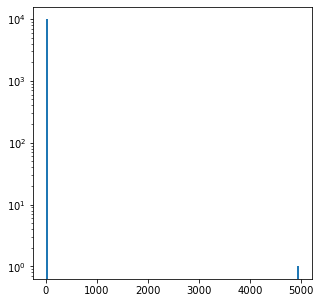

In [381]:
import matplotlib.pyplot as plt
import seaborn as sb
fig = plt.figure(figsize=(5,5))
plt.hist([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)], bins=100)
plt.yscale('log')
#plt.savefig("~/Downloads")

In [382]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[4960,
 10,
 9,
 9,
 8,
 5,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [412]:
G.number_of_edges()

1343518

In [410]:
len(clusters)

2682157

In [411]:
len(G.nodes)

14886